=> Data Understanding:

=> Importation des Packages nécessaires

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn import model_selection
import warnings
from sklearn.exceptions import ConvergenceWarning
from pandas.plotting import scatter_matrix

Chargement des données population pour le choix géographique

In [13]:
data_population_region = pd.read_csv('Datasets/fr_population.region.departement.csv')
df_data_population_region = pd.DataFrame(data_population_region)
print(df_data_population_region.columns)
df_data_population_region.head(10)

Index(['région', '1er janvier 2024 (p)', 'Recensement 1990',
       'Recensement 1999', '1er janvier 2008', 'Column1'],
      dtype='object')


,région,1er janvier 2024 (p),Recensement 1990,Recensement 1999,1er janvier 2008,Column1
0,Île-de-France,"12,419,961","10,644,665","10,946,012","11,659,260",NaN
1,Auvergne-Rhône-Alpes,"8,235,923","6,668,168","6,949,608","7,459,092",NaN
2,Nouvelle Aquitaine,"6,154,772","5,114,287","5,257,954","5,671,076",NaN
3,Occitanie,"6,154,729","4,546,249","4,842,680","5,419,946",NaN
4,Hauts-de-France,"5,983,823","5,770,671","5,855,448","5,931,091",NaN
5,Grand Est,"5,568,711","5,274,064","5,387,509","5,521,452",NaN
6,Provence-Alpes-Côte d'Azur,"5,198,011","4,257,244","4,502,385","4,882,913",NaN
7,Pays de la Loire,"3,926,389","3,055,197","3,219,960","3,510,170",NaN
8,Bretagne,"3,453,023","2,794,317","2,904,075","3,149,701",NaN
9,Normandie,"3,327,077","3,126,859","3,202,449","3,293,092",NaN


In [14]:
df_data_population_region=df_data_population_region.dropna(axis=1)

In [15]:
df_data_population_region.head(10)

,région,1er janvier 2024 (p),Recensement 1990,Recensement 1999,1er janvier 2008
0,Île-de-France,"12,419,961","10,644,665","10,946,012","11,659,260"
1,Auvergne-Rhône-Alpes,"8,235,923","6,668,168","6,949,608","7,459,092"
2,Nouvelle Aquitaine,"6,154,772","5,114,287","5,257,954","5,671,076"
3,Occitanie,"6,154,729","4,546,249","4,842,680","5,419,946"
4,Hauts-de-France,"5,983,823","5,770,671","5,855,448","5,931,091"
5,Grand Est,"5,568,711","5,274,064","5,387,509","5,521,452"
6,Provence-Alpes-Côte d'Azur,"5,198,011","4,257,244","4,502,385","4,882,913"
7,Pays de la Loire,"3,926,389","3,055,197","3,219,960","3,510,170"
8,Bretagne,"3,453,023","2,794,317","2,904,075","3,149,701"
9,Normandie,"3,327,077","3,126,859","3,202,449","3,293,092"


C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_13776\2963113274.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024['1er janvier 2024 (p)'] = data_2024['1er janvier 2024 (p)'].str.replace(',', '').astype(int)


0     12419961
1      8235923
2      6154772
3      6154729
4      5983823
5      5568711
6      5198011
7      3926389
8      3453023
9      3327077
10     2791719
11     2573295
12      355528
Name: 1er janvier 2024 (p), dtype: int32


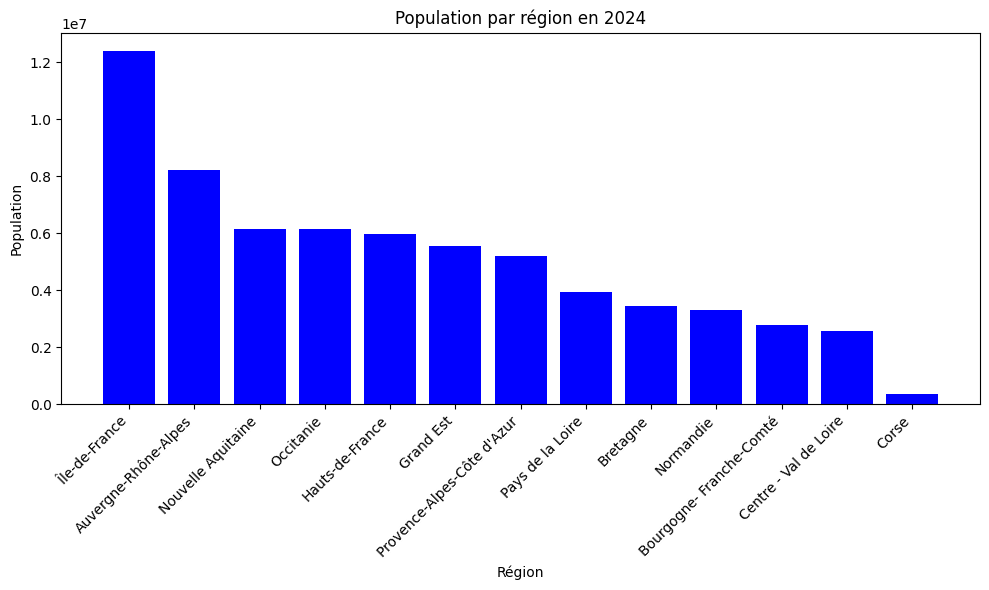

In [16]:
# Charger le fichier CSV dans un DataFrame
data_population_region = df_data_population_region

# Sélectionner uniquement les colonnes 'région' et '1er janvier 2024 (p)'
data_2024 = data_population_region[['région', '1er janvier 2024 (p)']]

# Remplacer les virgules dans les valeurs numériques et convertir en type int
data_2024['1er janvier 2024 (p)'] = data_2024['1er janvier 2024 (p)'].str.replace(',', '').astype(int)
print(data_2024['1er janvier 2024 (p)'])
# Créer le graphique
plt.figure(figsize=(10, 6))
plt.bar(data_2024['région'], data_2024['1er janvier 2024 (p)'], color='blue')

plt.title("Population par région en 2024")
plt.xlabel("Région")
plt.ylabel("Population")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Après avoir visualisé les données, il est clair que la région Auvergne-Rhône-Alpes se distingue comme
la deuxième région la plus peuplée en France, juste après l'Île-de-France. 
Cette constatation est cruciale pour notre programme de prédiction des élections en France. 
En effet, choisir cette région comme échantillon significatif pour notre programme est une décision stratégique et justifiée.
En choisissant la région Auvergne-Rhône-Alpes comme échantillon pour notre programme de prédiction des élections, nous nous appuyons sur une base solide et représentative qui nous permettra de tirer des conclusions précieuses et pertinentes pour l'ensemble de la France.

Chargement des données élections

In [17]:
data_elections_22 = pd.read_excel('Datasets/elections_t2_2022.xlsx')

In [18]:
# Liste des départements de la région Auvergne-Rhône-Alpes
departements_auvergne_rhone_alpes = ['AIN', 'ALLIER', 'ARDECHE', 'CANTAL', 'DROME', 'ISERE', 'LOIRE', 'HAUTE LOIRE', 'PUY DE DOME', 'RHONE', 'SAVOIE', 'HAUTE SAVOIE']
# Filtre pour les départements de la région Auvergne-Rhône-Alpes
auvergne_rhone_alpes_data_elections_22 = data_elections_22[data_elections_22['Libellé du département'].isin(departements_auvergne_rhone_alpes)]

# Afficher les premières lignes pour vérification
print(auvergne_rhone_alpes_data_elections_22.head())

# Enregistrez les données dans un nouveau fichier CSV
auvergne_rhone_alpes_data_elections_22.to_csv('Datasets/donnees_elections_22_auvergne_rhone_alpes.csv', index=False)

   Code du département Libellé du département  Inscrits  Abstentions  \
0                   01                    AIN    438250       109568   
2                   03                 ALLIER    249954        62306   
6                   07                ARDECHE    255931        62164   
14                  15                 CANTAL    115741        25815   
26                  26                  DROME    382280        96584   

    % Abs/Ins  Votants  % Vot/Ins  Blancs  % Blancs/Ins  % Blancs/Vot  ...  \
0       25.00   328682      75.00   19802          4.52          6.02  ...   
2       24.93   187648      75.07   13807          5.52          7.36  ...   
6       24.29   193767      75.71   15797          6.17          8.15  ...   
14      22.30    89926      77.70    6740          5.82          7.50  ...   
26      25.27   285696      74.73   21102          5.52          7.39  ...   

    Voix.0  % Voix/Ins.0  % Voix/Exp.0  Sexe.1   Nom.1  Prénom.1 Parti.1  \
0   166635         38.

In [19]:
donnees_elections_22_auvergne_rhone_alpes = pd.read_csv('Datasets/donnees_elections_22_auvergne_rhone_alpes.csv')


# Enregistrer le DataFrame dans un fichier Excel
donnees_elections_22_auvergne_rhone_alpes.to_excel('donnees_elections_22_auvergne_rhone_alpes.xlsx', index=False)

# Afficher les premières lignes pour vérification
donnees_elections_22_auvergne_rhone_alpes.head(12)

,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,...,Voix.0,% Voix/Ins.0,% Voix/Exp.0,Sexe.1,Nom.1,Prénom.1,Parti.1,Voix.1,% Voix/Ins.1,% Voix/Exp.1
0,1,AIN,438250,109568,25.00,328682,75.00,19802,4.52,6.02,...,166635,38.02,54.99,F,LE PEN,Marine,RN,136370,31.12,45.01
1,3,ALLIER,249954,62306,24.93,187648,75.07,13807,5.52,7.36,...,87645,35.06,52.35,F,LE PEN,Marine,RN,79761,31.91,47.65
2,7,ARDECHE,255931,62164,24.29,193767,75.71,15797,6.17,8.15,...,90254,35.26,52.40,F,LE PEN,Marine,RN,82001,32.04,47.60
3,15,CANTAL,115741,25815,22.30,89926,77.70,6740,5.82,7.50,...,45054,38.93,56.07,F,LE PEN,Marine,RN,35301,30.50,43.93
4,26,DROME,382280,96584,25.27,285696,74.73,21102,5.52,7.39,...,143696,37.59,55.72,F,LE PEN,Marine,RN,114216,29.88,44.28
5,38,ISERE,885888,229614,25.92,656274,74.08,43484,4.91,6.63,...,359685,40.60,59.80,F,LE PEN,Marine,RN,241749,27.29,40.20
6,42,LOIRE,513962,136870,26.63,377092,73.37,25382,4.94,6.73,...,194878,37.92,56.64,F,LE PEN,Marine,RN,149174,29.02,43.36
7,43,HAUTE LOIRE,180716,41139,22.76,139577,77.24,10846,6.00,7.77,...,62372,34.51,50.16,F,LE PEN,Marine,RN,61979,34.30,49.84
8,63,PUY DE DOME,468146,116494,24.88,351652,75.12,27453,5.86,7.81,...,188468,40.26,60.16,F,LE PEN,Marine,RN,124825,26.66,39.84
9,69,RHONE,1181791,315218,26.67,866573,73.33,49312,4.17,5.69,...,551544,46.67,68.66,F,LE PEN,Marine,RN,251720,21.30,31.34


In [20]:
donnees_elections_22_auvergne_rhone_alpes.columns

Index(['Code du département', 'Libellé du département', 'Inscrits',
       'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs',
       '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins', '% Nuls/Vot',
       'Exprimés', '% Exp/Ins', '% Exp/Vot', 'Sexe.0', 'Nom.0', 'Prénom.0',
       'Parti.0', 'Voix.0', '% Voix/Ins.0', '% Voix/Exp.0', 'Sexe.1', 'Nom.1',
       'Prénom.1', 'Parti.1', 'Voix.1', '% Voix/Ins.1', '% Voix/Exp.1'],
      dtype='object')

In [21]:
data_elections_17 = pd.read_excel('Datasets/elections_t2_2017.xlsx')

In [22]:
# Liste des départements de la région Auvergne-Rhône-Alpes
departements_auvergne_rhone_alpes = ['AIN', 'ALLIER', 'ARDECHE', 'CANTAL', 'DROME', 'ISERE', 'LOIRE', 'HAUTE LOIRE', 'PUY DE DOME', 'RHONE', 'SAVOIE', 'HAUTE SAVOIE']

# Filtre pour les départements de la région Auvergne-Rhône-Alpes
auvergne_rhone_alpes_data_elections_17 = data_elections_17[data_elections_17['Libellé du département'].isin(departements_auvergne_rhone_alpes)]

# Afficher les premières lignes pour vérification
print(auvergne_rhone_alpes_data_elections_17.head())

# Enregistrez les données dans un nouveau fichier CSV
auvergne_rhone_alpes_data_elections_17.to_csv('Datasets/donnees_elections_17_auvergne_rhone_alpes.csv', index=False)

   Code du département Libellé du département  Inscrits  Abstentions  \
0                    1                    AIN    415950        93130   
2                    3                 ALLIER    253479        59294   
6                    7                ARDECHE    249216        54487   
14                  15                 CANTAL    117394        25279   
26                  26                  DROME    369462        82109   

    % Abs/Ins  Votants  % Vot/Ins  Blancs  % Blancs/Ins  % Blancs/Vot  ...  \
0       22.39   322820      77.61   28852          6.94          8.94  ...   
2       23.39   194185      76.61   18877          7.45          9.72  ...   
6       21.86   194729      78.14   19800          7.94         10.17  ...   
14      21.53    92115      78.47    9039          7.70          9.81  ...   
26      22.22   287353      77.78   26411          7.15          9.19  ...   

    Voix.0  % Voix/Ins.0  % Voix/Exp.0  Sexe.1   Nom.1  Prénom.1 Parti.1  \
0   173809         41.

In [23]:
donnees_elections_17_auvergne_rhone_alpes = pd.read_csv('Datasets/donnees_elections_17_auvergne_rhone_alpes.csv')
donnees_elections_17_auvergne_rhone_alpes.to_excel('donnees_elections_17_auvergne_rhone_alpes.xlsx', index=False)
# Afficher les premières lignes pour vérification
donnees_elections_17_auvergne_rhone_alpes.head(12)

,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,...,Voix.0,% Voix/Ins.0,% Voix/Exp.0,Sexe.1,Nom.1,Prénom.1,Parti.1,Voix.1,% Voix/Ins.1,% Voix/Exp.1
0,1,AIN,415950,93130,22.39,322820,77.61,28852,6.94,8.94,...,173809,41.79,60.94,F,LE PEN,Marine,FN,111421,26.79,39.06
1,3,ALLIER,253479,59294,23.39,194185,76.61,18877,7.45,9.72,...,106579,42.05,63.90,F,LE PEN,Marine,FN,60207,23.75,36.10
2,7,ARDECHE,249216,54487,21.86,194729,78.14,19800,7.94,10.17,...,104599,41.97,62.37,F,LE PEN,Marine,FN,63109,25.32,37.63
3,15,CANTAL,117394,25279,21.53,92115,78.47,9039,7.70,9.81,...,55411,47.20,69.83,F,LE PEN,Marine,FN,23938,20.39,30.17
4,26,DROME,369462,82109,22.22,287353,77.78,26411,7.15,9.19,...,157992,42.76,62.62,F,LE PEN,Marine,FN,94312,25.53,37.38
5,38,ISERE,856330,202643,23.66,653687,76.34,56622,6.61,8.66,...,383197,44.75,65.81,F,LE PEN,Marine,FN,199097,23.25,34.19
6,42,LOIRE,510903,123362,24.15,387541,75.85,34501,6.75,8.90,...,218603,42.79,63.86,F,LE PEN,Marine,FN,123714,24.21,36.14
7,43,HAUTE LOIRE,177116,37641,21.25,139475,78.75,14104,7.96,10.11,...,76233,43.04,63.35,F,LE PEN,Marine,FN,44112,24.91,36.65
8,63,PUY DE DOME,460919,105034,22.79,355885,77.21,34639,7.52,9.73,...,219437,47.61,71.34,F,LE PEN,Marine,FN,88155,19.13,28.66
9,69,RHONE,1155506,289848,25.08,865658,74.92,69066,5.98,7.98,...,572015,49.50,73.59,F,LE PEN,Marine,FN,205317,17.77,26.41


In [24]:
data_elections_12 = pd.read_excel('Datasets/elections_t2_2012.xlsx')

In [25]:
# Liste des départements de la région Auvergne-Rhône-Alpes
departements_auvergne_rhone_alpes = ['AIN', 'ALLIER', 'ARDECHE', 'CANTAL', 'DROME', 'ISERE', 'LOIRE', 'HAUTE LOIRE', 'PUY DE DOME', 'RHONE', 'SAVOIE', 'HAUTE SAVOIE']

# Filtre pour les départements de la région Auvergne-Rhône-Alpes
auvergne_rhone_alpes_data_elections_12 = data_elections_12[data_elections_12['Libellé du département'].isin(departements_auvergne_rhone_alpes)]

# Afficher les premières lignes pour vérification
print(auvergne_rhone_alpes_data_elections_12.head())

# Enregistrez les données dans un nouveau fichier CSV
auvergne_rhone_alpes_data_elections_12.to_csv('Datasets/donnees_elections_12_auvergne_rhone_alpes.csv', index=False)

   Code du département Libellé du département  Inscrits  Abstentions  \
0                    1                    AIN    393866      67279.0   
2                    3                 ALLIER    256211      45079.0   
6                    7                ARDECHE    243351      39421.0   
14                  15                 CANTAL    120931      19078.0   
26                  26                  DROME    353114      60130.0   

    % Abs/Ins   Votants  % Vot/Ins  Blancs et nuls  % BlNuls/Ins  \
0       17.08  326587.0      82.92         19513.0          4.95   
2       17.59  211132.0      82.41         14924.0          5.82   
6       16.20  203930.0      83.80         13975.0          5.74   
14      15.78  101853.0      84.22          6213.0          5.14   
26      17.03  292984.0      82.97         18589.0          5.26   

    % BlNuls/Vot  ...    Voix.0  % Voix/Ins.0  % Voix/Exp.0 Sexe.1    Nom.1  \
0           5.97  ...  131333.0         33.34         42.77      M  SARKOZY   


In [26]:
donnees_elections_12_auvergne_rhone_alpes = pd.read_csv('Datasets/donnees_elections_12_auvergne_rhone_alpes.csv')
donnees_elections_12_auvergne_rhone_alpes.to_excel('donnees_elections_12_auvergne_rhone_alpes.xlsx', index=False)
# Afficher les premières lignes pour vérification
donnees_elections_12_auvergne_rhone_alpes.head(12)

,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs et nuls,% BlNuls/Ins,% BlNuls/Vot,...,Voix.0,% Voix/Ins.0,% Voix/Exp.0,Sexe.1,Nom.1,Prénom.1,Parti.1,Voix.1,% Voix/Ins.1,% Voix/Exp.1
0,1,AIN,393866,67279.0,17.08,326587.0,82.92,19513.0,4.95,5.97,...,131333.0,33.34,42.77,M,SARKOZY,Nicolas,UMP,175741.0,44.62,57.23
1,3,ALLIER,256211,45079.0,17.59,211132.0,82.41,14924.0,5.82,7.07,...,111615.0,43.56,56.89,M,SARKOZY,Nicolas,UMP,84593.0,33.02,43.11
2,7,ARDECHE,243351,39421.0,16.20,203930.0,83.80,13975.0,5.74,6.85,...,101526.0,41.72,53.45,M,SARKOZY,Nicolas,UMP,88429.0,36.34,46.55
3,15,CANTAL,120931,19078.0,15.78,101853.0,84.22,6213.0,5.14,6.10,...,49543.0,40.97,51.80,M,SARKOZY,Nicolas,UMP,46097.0,38.12,48.20
4,26,DROME,353114,60130.0,17.03,292984.0,82.97,18589.0,5.26,6.34,...,134959.0,38.22,49.18,M,SARKOZY,Nicolas,UMP,139436.0,39.49,50.82
5,38,ISERE,821554,147791.0,17.99,673763.0,82.01,37886.0,4.61,5.62,...,331448.0,40.34,52.12,M,SARKOZY,Nicolas,UMP,304429.0,37.06,47.88
6,42,LOIRE,509732,93595.0,18.36,416137.0,81.64,26994.0,5.30,6.49,...,196522.0,38.55,50.50,M,SARKOZY,Nicolas,UMP,192621.0,37.79,49.50
7,43,HAUTE LOIRE,176028,27456.0,15.60,148572.0,84.40,11381.0,6.47,7.66,...,70488.0,40.04,51.38,M,SARKOZY,Nicolas,UMP,66703.0,37.89,48.62
8,63,PUY DE DOME,449281,72953.0,16.24,376328.0,83.76,24736.0,5.51,6.57,...,212597.0,47.32,60.47,M,SARKOZY,Nicolas,UMP,138995.0,30.94,39.53
9,69,RHONE,1100976,207138.0,18.81,893838.0,81.19,41569.0,3.78,4.65,...,408899.0,37.14,47.98,M,SARKOZY,Nicolas,UMP,443370.0,40.27,52.02


In [27]:
data_elections_07 = pd.read_excel('Datasets/elections_t2_2007.xlsx')

In [28]:
# Liste des départements de la région Auvergne-Rhône-Alpes
departements_auvergne_rhone_alpes = ['AIN', 'ALLIER', 'ARDECHE', 'CANTAL', 'DROME', 'ISERE', 'LOIRE', 'HAUTE LOIRE', 'PUY DE DOME', 'RHONE', 'SAVOIE', 'HAUTE SAVOIE']

# Filtre pour les départements de la région Auvergne-Rhône-Alpes
auvergne_rhone_alpes_data_elections_07 = data_elections_07[data_elections_07['Libellé du département'].isin(departements_auvergne_rhone_alpes)]

# Afficher les premières lignes pour vérification
print(auvergne_rhone_alpes_data_elections_07.head())

# Enregistrez les données dans un nouveau fichier CSV
auvergne_rhone_alpes_data_elections_07.to_csv('Datasets/donnees_elections_07_auvergne_rhone_alpes.csv', index=False)

   Code du département Libellé du département  Inscrits  Abstentions  \
0                    1                    AIN    372951        53428   
2                    3                 ALLIER    259503        38826   
6                    7                ARDECHE    235544        31610   
14                  15                 CANTAL    123322        16704   
26                  26                  DROME    338120        47344   

   % Abs/Ins  Votants % Vot/Ins  Blancs et nuls % BlNuls/Ins % BlNuls/Vot  \
0      14,33   319523     85,67           13670         3,67         4,28   
2      14,96   220677     85,04           10809         4,17         4,90   
6      13,42   203934     86,58            9399         3,99         4,61   
14     13,55   106618     86,45            4429         3,59         4,15   
26     14,00   290776     86,00           12910         3,82         4,44   

    ...  Parti.0 % Voix/Ins.0 % Voix/Exp.0 Sexe.1  Nom.1  Prénom.1  Parti.1  \
0   ...      UMP        4

In [29]:
donnees_elections_07_auvergne_rhone_alpes = pd.read_csv('Datasets/donnees_elections_07_auvergne_rhone_alpes.csv')
# Enregistrer le DataFrame dans un fichier Excel
donnees_elections_07_auvergne_rhone_alpes.to_excel('donnees_elections_07_auvergne_rhone_alpes.xlsx', index=False)
# Afficher les premières lignes pour vérification
donnees_elections_07_auvergne_rhone_alpes.head()

,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs et nuls,% BlNuls/Ins,% BlNuls/Vot,...,Parti.0,% Voix/Ins.0,% Voix/Exp.0,Sexe.1,Nom.1,Prénom.1,Parti.1,Voix.1,% Voix/Ins.1,% Voix/Exp.1
0,1,AIN,372951,53428,"14,33",319523,"85,67",13670,"3,67","4,28",...,UMP,"49,65","60,54",F,ROYAL,Ségolène,PS,120679,"32,36","39,46"
1,3,ALLIER,259503,38826,"14,96",220677,"85,04",10809,"4,17","4,90",...,UMP,"39,47","48,80",F,ROYAL,Ségolène,PS,107442,"41,40","51,20"
2,7,ARDECHE,235544,31610,"13,42",203934,"86,58",9399,"3,99","4,61",...,UMP,"42,63","51,62",F,ROYAL,Ségolène,PS,94121,"39,96","48,38"
3,15,CANTAL,123322,16704,"13,55",106618,"86,45",4429,"3,59","4,15",...,UMP,"46,21","55,76",F,ROYAL,Ségolène,PS,45208,"36,66","44,24"
4,26,DROME,338120,47344,"14,00",290776,"86,00",12910,"3,82","4,44",...,UMP,"45,10","54,88",F,ROYAL,Ségolène,PS,125384,"37,08","45,12"


In [30]:
donnees_elections_07_auvergne_rhone_alpes = pd.read_csv('Datasets/donnees_elections_07_auvergne_rhone_alpes.csv')

# Afficher les premières lignes pour vérification
donnees_elections_07_auvergne_rhone_alpes.head()


,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs et nuls,% BlNuls/Ins,% BlNuls/Vot,...,Parti.0,% Voix/Ins.0,% Voix/Exp.0,Sexe.1,Nom.1,Prénom.1,Parti.1,Voix.1,% Voix/Ins.1,% Voix/Exp.1
0,1,AIN,372951,53428,"14,33",319523,"85,67",13670,"3,67","4,28",...,UMP,"49,65","60,54",F,ROYAL,Ségolène,PS,120679,"32,36","39,46"
1,3,ALLIER,259503,38826,"14,96",220677,"85,04",10809,"4,17","4,90",...,UMP,"39,47","48,80",F,ROYAL,Ségolène,PS,107442,"41,40","51,20"
2,7,ARDECHE,235544,31610,"13,42",203934,"86,58",9399,"3,99","4,61",...,UMP,"42,63","51,62",F,ROYAL,Ségolène,PS,94121,"39,96","48,38"
3,15,CANTAL,123322,16704,"13,55",106618,"86,45",4429,"3,59","4,15",...,UMP,"46,21","55,76",F,ROYAL,Ségolène,PS,45208,"36,66","44,24"
4,26,DROME,338120,47344,"14,00",290776,"86,00",12910,"3,82","4,44",...,UMP,"45,10","54,88",F,ROYAL,Ségolène,PS,125384,"37,08","45,12"


Importation des données Chomage

In [31]:
donnees_chomage = pd.read_csv('Datasets/données_chomage_années.csv')

# Afficher les premières lignes pour vérification
donnees_chomage.head(12)


,Code du département,Libellé du département,T1_1982,T2_1982,T3_1982,T4_1982,T1_1983,T2_1983,T3_1983,T4_1983,...,T4_2020,T1_2021,T2_2021,T3_2021,T4_2021,T1_2022,T2_2022,T3_2022,T4_2022,T1_2023
0,01,AIN,3.8,3.9,4.0,4.1,4.2,4.2,4.4,4.6,...,6.1,6.2,6.0,6.0,5.6,5.5,5.5,5.5,5.4,5.3
1,02,AISNE,8.2,8.4,8.5,8.4,8.5,8.5,8.7,9.1,...,11.0,11.3,10.8,11.2,10.7,10.6,10.5,10.3,10.3,10.4
2,03,ALLIER,7.3,7.5,7.7,7.7,7.7,7.7,7.8,8.4,...,8.3,8.4,8.3,8.2,7.7,7.7,7.8,7.7,7.4,7.5
3,04,ALPES-DE-HAUTE-PROVENCE,5.5,5.6,5.8,6.0,6.1,6.1,6.3,6.6,...,8.9,9.2,9.1,8.8,8.3,8.3,8.3,8.4,8.1,8.0
4,05,HAUTES-ALPES,4.9,4.9,5.0,5.3,5.7,5.8,6.0,6.4,...,7.8,9.6,8.0,7.5,7.0,7.1,6.9,6.9,6.7,6.7
5,06,ALPES-MARITIMES,8.5,8.7,9.1,9.2,9.1,9.3,9.4,9.7,...,9.0,9.0,8.8,8.5,7.8,7.6,7.3,7.3,7.2,7.1
6,07,ARDECHE,6.6,6.8,7.0,7.2,7.2,7.3,7.6,7.8,...,8.6,8.9,8.7,8.7,8.2,8.2,8.1,8.1,7.9,7.8
7,08,ARDENNES,8.7,8.9,9.1,9.0,9.0,8.9,9.2,9.7,...,9.5,9.7,9.3,9.6,9.4,9.5,9.5,9.3,9.2,9.4
8,09,ARIEGE,7.4,7.4,7.3,7.3,7.3,7.1,6.9,7.0,...,9.8,10.0,9.5,9.8,9.2,9.3,9.4,9.4,9.3,9.2
9,10,AUBE,6.2,6.1,6.0,6.0,5.8,5.8,6.2,6.5,...,10.1,10.3,9.9,10.1,9.7,9.7,9.6,9.5,9.4,9.4


In [32]:
# Liste des départements de la région Auvergne-Rhône-Alpes
departements_auvergne_rhone_alpes = ['AIN', 'ALLIER', 'ARDECHE', 'CANTAL', 'DROME', 'ISERE', 'LOIRE', 'HAUTE LOIRE', 'PUY DE DOME', 'RHONE', 'SAVOIE', 'HAUTE SAVOIE']

# Filtre pour les départements de la région Auvergne-Rhône-Alpes
auvergne_rhone_alpes_donnees_chomage = donnees_chomage[donnees_chomage['Libellé du département'].isin(departements_auvergne_rhone_alpes)]

# Afficher les premières lignes pour vérification
print(auvergne_rhone_alpes_donnees_chomage.head())

# Enregistrez les données dans un nouveau fichier CSV
auvergne_rhone_alpes_donnees_chomage.to_csv('Datasets/donnees_chomage_auvergne_rhone_alpes.csv', index=False)

   Code du département Libellé du département  T1_1982  T2_1982  T3_1982  \
0                   01                    AIN      3.8      3.9      4.0   
2                   03                 ALLIER      7.3      7.5      7.7   
6                   07                ARDECHE      6.6      6.8      7.0   
14                  15                 CANTAL      6.8      7.2      7.4   
24                  26                  DROME      5.8      6.0      6.2   

    T4_1982  T1_1983  T2_1983  T3_1983  T4_1983  ...  T4_2020  T1_2021  \
0       4.1      4.2      4.2      4.4      4.6  ...      6.1      6.2   
2       7.7      7.7      7.7      7.8      8.4  ...      8.3      8.4   
6       7.2      7.2      7.3      7.6      7.8  ...      8.6      8.9   
14      7.2      7.2      7.2      7.3      7.5  ...      4.6      4.6   
24      6.4      6.4      6.5      6.8      7.1  ...      8.6      8.7   

    T2_2021  T3_2021  T4_2021  T1_2022  T2_2022  T3_2022  T4_2022  T1_2023  
0       6.0      6.0 

In [33]:
# Charger les données du chômage
auvergne_rhone_alpes_donnees_chomage = pd.read_csv("Datasets/donnees_chomage_auvergne_rhone_alpes.csv")

# Renommer les colonnes
auvergne_rhone_alpes_donnees_chomage.rename(columns={"Code": "Code du département", "Libellé": "Libellé du département"}, inplace=True)

# Afficher les premières lignes pour vérification
auvergne_rhone_alpes_donnees_chomage.head(12)


,Code du département,Libellé du département,T1_1982,T2_1982,T3_1982,T4_1982,T1_1983,T2_1983,T3_1983,T4_1983,...,T4_2020,T1_2021,T2_2021,T3_2021,T4_2021,T1_2022,T2_2022,T3_2022,T4_2022,T1_2023
0,1,AIN,3.8,3.9,4.0,4.1,4.2,4.2,4.4,4.6,...,6.1,6.2,6.0,6.0,5.6,5.5,5.5,5.5,5.4,5.3
1,3,ALLIER,7.3,7.5,7.7,7.7,7.7,7.7,7.8,8.4,...,8.3,8.4,8.3,8.2,7.7,7.7,7.8,7.7,7.4,7.5
2,7,ARDECHE,6.6,6.8,7.0,7.2,7.2,7.3,7.6,7.8,...,8.6,8.9,8.7,8.7,8.2,8.2,8.1,8.1,7.9,7.8
3,15,CANTAL,6.8,7.2,7.4,7.2,7.2,7.2,7.3,7.5,...,4.6,4.6,4.3,4.2,4.0,4.0,4.1,4.1,4.1,4.0
4,26,DROME,5.8,6.0,6.2,6.4,6.4,6.5,6.8,7.1,...,8.6,8.7,8.5,8.7,8.1,7.9,7.9,7.8,7.7,7.7
5,38,ISERE,5.4,5.6,5.7,5.7,5.6,5.6,5.7,6.0,...,6.6,6.9,6.5,6.5,6.1,6.0,6.0,5.9,5.7,5.7
6,42,LOIRE,7.7,7.7,7.9,8.0,7.9,8.0,8.3,8.7,...,7.8,7.9,7.7,7.7,7.2,7.1,7.3,7.2,7.1,7.0
7,43,HAUTE LOIRE,5.5,5.7,5.9,6.0,6.0,5.9,6.1,6.3,...,6.1,6.2,6.1,6.1,5.7,5.6,5.7,5.7,5.5,5.5
8,63,PUY DE DOME,6.1,6.2,6.4,6.5,6.5,6.4,6.5,6.7,...,6.9,7.0,6.9,6.8,6.4,6.2,6.4,6.4,6.2,6.1
9,69,RHONE,5.3,5.3,5.4,5.5,5.4,5.3,5.4,5.5,...,7.4,7.5,7.1,7.1,6.6,6.5,6.5,6.3,6.2,6.0


In [34]:
auvergne_rhone_alpes_data_population = pd.read_excel('Datasets/données_population.xlsx')

In [35]:
# Afficher les premières lignes pour vérification
print(auvergne_rhone_alpes_data_population.head())

# Enregistrez les données dans un nouveau fichier CSV
auvergne_rhone_alpes_data_population.to_csv('Datasets/donnees_population_auvergne_rhone_alpes.csv', index=False)

   Code du département Libellé du département  POPULATION_2021  \
0                    1                    AIN           663202   
1                    3                 ALLIER           334872   
2                    7                ARDECHE           331415   
3                   15                 CANTAL           144226   
4                   26                  DROME           519458   

   POPULATION_2020  POPULATION_2019  POPULATION_2018  POPULATION_2015  \
0           657856           652432           647634           631877   
1           335628           335975           337171           341613   
2           329325           328278           326606           324209   
3           144379           144692           144765           146219   
4           517709           516762           514732           504637   

   POPULATION_2013  
0           619497  
1           343431  
2           320379  
3           147035  
4           494712  


In [36]:
auvergne_rhone_alpes_data_pauverté = pd.read_excel('Datasets/données_pauvreté_années.xlsx')

In [37]:
# Afficher les premières lignes pour vérificatio
auvergne_rhone_alpes_data_pauverté.head(12)

,Code du département,Libellé du département,Taux de pauvreté 2018,Taux de pauvreté2019,Taux de pauvreté 2020,Taux de pauvreté 2021
0,1,AIN,10.3,10.7,10.5,10.8
1,2,Aisne,18.4,18.4,18.0,18.8
2,3,ALLIER,15.5,15.4,15.3,16.2
3,4,Alpes-de-Haute-Provence,16.8,16.6,16.6,17.1
4,5,Hautes-Alpes,13.9,13.9,13.9,14.7
5,6,Alpes-Maritimes,15.8,15.8,16.2,16.4
6,7,ARDECHE,14.4,14.3,14.3,14.9
7,8,Ardennes,18.9,18.6,18.3,19.4
8,9,Ariège,18.0,17.9,17.9,19.0
9,10,Aube,16.2,16.3,16.2,16.9


In [38]:
# Liste des départements de la région Auvergne-Rhône-Alpes
departements_auvergne_rhone_alpes = ['AIN', 'ALLIER', 'ARDECHE', 'CANTAL', 'DROME', 'ISERE', 'LOIRE', 'HAUTE LOIRE', 'PUY DE DOME', 'RHONE', 'SAVOIE', 'HAUTE SAVOIE']

# Filtre pour les départements de la région Auvergne-Rhône-Alpes
auvergne_rhone_alpes_data_pauvreté = auvergne_rhone_alpes_data_pauverté[auvergne_rhone_alpes_data_pauverté['Libellé du département'].isin(departements_auvergne_rhone_alpes)]

# Afficher les premières lignes pour vérification

# Enregistrez les données dans un nouveau fichier CSV
auvergne_rhone_alpes_data_pauvreté.to_csv('Datasets/donnees_pauvreté_auvergne_rhone_alpes.csv', index=False)
auvergne_rhone_alpes_data_pauvreté.to_excel('Datasets/donnees_pauvreté_auvergne_rhone_alpes.xlsx', index=False)
# Calculer le taux de pauvreté moyen pour chaque année
taux_pauvrete_moyen_par_annee = auvergne_rhone_alpes_data_pauvreté[['Taux de pauvreté 2018', 'Taux de pauvreté2019', 'Taux de pauvreté 2020', 'Taux de pauvreté 2021']].mean(axis=0)

# Afficher le taux de pauvreté moyen pour chaque année
print("Taux de pauvreté moyen par année dans la région :")
print(taux_pauvrete_moyen_par_annee)

auvergne_rhone_alpes_data_pauvreté.head(12)


Taux de pauvreté moyen par année dans la région :
Taux de pauvreté 2018    12.725000
Taux de pauvreté2019     12.775000
Taux de pauvreté 2020    12.741667
Taux de pauvreté 2021    13.350000
dtype: float64


,Code du département,Libellé du département,Taux de pauvreté 2018,Taux de pauvreté2019,Taux de pauvreté 2020,Taux de pauvreté 2021
0,1,AIN,10.3,10.7,10.5,10.8
2,3,ALLIER,15.5,15.4,15.3,16.2
6,7,ARDECHE,14.4,14.3,14.3,14.9
14,15,CANTAL,13.0,13.0,13.2,14.2
24,26,DROME,14.8,14.6,14.4,14.8
38,38,ISERE,11.3,11.5,11.3,11.8
42,42,LOIRE,15.0,15.1,15.0,15.8
43,43,HAUTE LOIRE,12.1,11.9,11.9,12.3
63,63,PUY DE DOME,13.2,13.1,13.2,13.9
69,69,RHONE,14.2,14.2,14.1,14.8


In [39]:
auvergne_rhone_alpes_data_pauvreté.head(12)

,Code du département,Libellé du département,Taux de pauvreté 2018,Taux de pauvreté2019,Taux de pauvreté 2020,Taux de pauvreté 2021
0,1,AIN,10.3,10.7,10.5,10.8
2,3,ALLIER,15.5,15.4,15.3,16.2
6,7,ARDECHE,14.4,14.3,14.3,14.9
14,15,CANTAL,13.0,13.0,13.2,14.2
24,26,DROME,14.8,14.6,14.4,14.8
38,38,ISERE,11.3,11.5,11.3,11.8
42,42,LOIRE,15.0,15.1,15.0,15.8
43,43,HAUTE LOIRE,12.1,11.9,11.9,12.3
63,63,PUY DE DOME,13.2,13.1,13.2,13.9
69,69,RHONE,14.2,14.2,14.1,14.8


Pré-traitement

In [40]:
auvergne_rhone_alpes_data_population.head(12)

,Code du département,Libellé du département,POPULATION_2021,POPULATION_2020,POPULATION_2019,POPULATION_2018,POPULATION_2015,POPULATION_2013
0,1,AIN,663202,657856,652432,647634,631877,619497
1,3,ALLIER,334872,335628,335975,337171,341613,343431
2,7,ARDECHE,331415,329325,328278,326606,324209,320379
3,15,CANTAL,144226,144379,144692,144765,146219,147035
4,26,DROME,519458,517709,516762,514732,504637,494712
5,38,ISERE,1284948,1277513,1271166,1263563,1251060,1235387
6,42,LOIRE,769029,768508,765634,763441,759411,756715
7,43,HAUTE LOIRE,227284,227489,227570,227552,227034,226203
8,63,PUY DE DOME,662285,661852,662152,659048,647501,640999
9,69,RHONE,1893692,1883437,1875747,1859524,1821995,1779845


In [41]:
auvergne_rhone_alpes_donnees_chomage.head(12)

,Code du département,Libellé du département,T1_1982,T2_1982,T3_1982,T4_1982,T1_1983,T2_1983,T3_1983,T4_1983,...,T4_2020,T1_2021,T2_2021,T3_2021,T4_2021,T1_2022,T2_2022,T3_2022,T4_2022,T1_2023
0,1,AIN,3.8,3.9,4.0,4.1,4.2,4.2,4.4,4.6,...,6.1,6.2,6.0,6.0,5.6,5.5,5.5,5.5,5.4,5.3
1,3,ALLIER,7.3,7.5,7.7,7.7,7.7,7.7,7.8,8.4,...,8.3,8.4,8.3,8.2,7.7,7.7,7.8,7.7,7.4,7.5
2,7,ARDECHE,6.6,6.8,7.0,7.2,7.2,7.3,7.6,7.8,...,8.6,8.9,8.7,8.7,8.2,8.2,8.1,8.1,7.9,7.8
3,15,CANTAL,6.8,7.2,7.4,7.2,7.2,7.2,7.3,7.5,...,4.6,4.6,4.3,4.2,4.0,4.0,4.1,4.1,4.1,4.0
4,26,DROME,5.8,6.0,6.2,6.4,6.4,6.5,6.8,7.1,...,8.6,8.7,8.5,8.7,8.1,7.9,7.9,7.8,7.7,7.7
5,38,ISERE,5.4,5.6,5.7,5.7,5.6,5.6,5.7,6.0,...,6.6,6.9,6.5,6.5,6.1,6.0,6.0,5.9,5.7,5.7
6,42,LOIRE,7.7,7.7,7.9,8.0,7.9,8.0,8.3,8.7,...,7.8,7.9,7.7,7.7,7.2,7.1,7.3,7.2,7.1,7.0
7,43,HAUTE LOIRE,5.5,5.7,5.9,6.0,6.0,5.9,6.1,6.3,...,6.1,6.2,6.1,6.1,5.7,5.6,5.7,5.7,5.5,5.5
8,63,PUY DE DOME,6.1,6.2,6.4,6.5,6.5,6.4,6.5,6.7,...,6.9,7.0,6.9,6.8,6.4,6.2,6.4,6.4,6.2,6.1
9,69,RHONE,5.3,5.3,5.4,5.5,5.4,5.3,5.4,5.5,...,7.4,7.5,7.1,7.1,6.6,6.5,6.5,6.3,6.2,6.0


In [42]:
donnees_elections_07_auvergne_rhone_alpes.head(12)

,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs et nuls,% BlNuls/Ins,% BlNuls/Vot,...,Parti.0,% Voix/Ins.0,% Voix/Exp.0,Sexe.1,Nom.1,Prénom.1,Parti.1,Voix.1,% Voix/Ins.1,% Voix/Exp.1
0,1,AIN,372951,53428,"14,33",319523,"85,67",13670,"3,67","4,28",...,UMP,"49,65","60,54",F,ROYAL,Ségolène,PS,120679,"32,36","39,46"
1,3,ALLIER,259503,38826,"14,96",220677,"85,04",10809,"4,17","4,90",...,UMP,"39,47","48,80",F,ROYAL,Ségolène,PS,107442,"41,40","51,20"
2,7,ARDECHE,235544,31610,"13,42",203934,"86,58",9399,"3,99","4,61",...,UMP,"42,63","51,62",F,ROYAL,Ségolène,PS,94121,"39,96","48,38"
3,15,CANTAL,123322,16704,"13,55",106618,"86,45",4429,"3,59","4,15",...,UMP,"46,21","55,76",F,ROYAL,Ségolène,PS,45208,"36,66","44,24"
4,26,DROME,338120,47344,"14,00",290776,"86,00",12910,"3,82","4,44",...,UMP,"45,10","54,88",F,ROYAL,Ségolène,PS,125384,"37,08","45,12"
5,38,ISERE,784163,113070,"14,42",671093,"85,58",27707,"3,53","4,13",...,UMP,"42,76","52,12",F,ROYAL,Ségolène,PS,308072,"39,29","47,88"
6,42,LOIRE,505913,79025,"15,62",426888,"84,38",19819,"3,92","4,64",...,UMP,"43,81","54,45",F,ROYAL,Ségolène,PS,185421,"36,65","45,55"
7,43,HAUTE LOIRE,173262,23377,"13,49",149885,"86,51",7714,"4,45","5,15",...,UMP,"44,49","54,22",F,ROYAL,Ségolène,PS,65085,"37,56","45,78"
8,63,PUY DE DOME,443310,58836,"13,27",384474,"86,73",17700,"3,99","4,60",...,UMP,"38,09","46,04",F,ROYAL,Ségolène,PS,197915,"44,64","53,96"
9,69,RHONE,1037922,153002,"14,74",884920,"85,26",34314,"3,31","3,88",...,UMP,"46,79","57,09",F,ROYAL,Ségolène,PS,364978,"35,16","42,91"


In [43]:
donnees_elections_12_auvergne_rhone_alpes.head(12)

,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs et nuls,% BlNuls/Ins,% BlNuls/Vot,...,Voix.0,% Voix/Ins.0,% Voix/Exp.0,Sexe.1,Nom.1,Prénom.1,Parti.1,Voix.1,% Voix/Ins.1,% Voix/Exp.1
0,1,AIN,393866,67279.0,17.08,326587.0,82.92,19513.0,4.95,5.97,...,131333.0,33.34,42.77,M,SARKOZY,Nicolas,UMP,175741.0,44.62,57.23
1,3,ALLIER,256211,45079.0,17.59,211132.0,82.41,14924.0,5.82,7.07,...,111615.0,43.56,56.89,M,SARKOZY,Nicolas,UMP,84593.0,33.02,43.11
2,7,ARDECHE,243351,39421.0,16.20,203930.0,83.80,13975.0,5.74,6.85,...,101526.0,41.72,53.45,M,SARKOZY,Nicolas,UMP,88429.0,36.34,46.55
3,15,CANTAL,120931,19078.0,15.78,101853.0,84.22,6213.0,5.14,6.10,...,49543.0,40.97,51.80,M,SARKOZY,Nicolas,UMP,46097.0,38.12,48.20
4,26,DROME,353114,60130.0,17.03,292984.0,82.97,18589.0,5.26,6.34,...,134959.0,38.22,49.18,M,SARKOZY,Nicolas,UMP,139436.0,39.49,50.82
5,38,ISERE,821554,147791.0,17.99,673763.0,82.01,37886.0,4.61,5.62,...,331448.0,40.34,52.12,M,SARKOZY,Nicolas,UMP,304429.0,37.06,47.88
6,42,LOIRE,509732,93595.0,18.36,416137.0,81.64,26994.0,5.30,6.49,...,196522.0,38.55,50.50,M,SARKOZY,Nicolas,UMP,192621.0,37.79,49.50
7,43,HAUTE LOIRE,176028,27456.0,15.60,148572.0,84.40,11381.0,6.47,7.66,...,70488.0,40.04,51.38,M,SARKOZY,Nicolas,UMP,66703.0,37.89,48.62
8,63,PUY DE DOME,449281,72953.0,16.24,376328.0,83.76,24736.0,5.51,6.57,...,212597.0,47.32,60.47,M,SARKOZY,Nicolas,UMP,138995.0,30.94,39.53
9,69,RHONE,1100976,207138.0,18.81,893838.0,81.19,41569.0,3.78,4.65,...,408899.0,37.14,47.98,M,SARKOZY,Nicolas,UMP,443370.0,40.27,52.02


=> Description et analyse des données

In [44]:
donnees_elections_17_auvergne_rhone_alpes.head(12)

,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,...,Voix.0,% Voix/Ins.0,% Voix/Exp.0,Sexe.1,Nom.1,Prénom.1,Parti.1,Voix.1,% Voix/Ins.1,% Voix/Exp.1
0,1,AIN,415950,93130,22.39,322820,77.61,28852,6.94,8.94,...,173809,41.79,60.94,F,LE PEN,Marine,FN,111421,26.79,39.06
1,3,ALLIER,253479,59294,23.39,194185,76.61,18877,7.45,9.72,...,106579,42.05,63.90,F,LE PEN,Marine,FN,60207,23.75,36.10
2,7,ARDECHE,249216,54487,21.86,194729,78.14,19800,7.94,10.17,...,104599,41.97,62.37,F,LE PEN,Marine,FN,63109,25.32,37.63
3,15,CANTAL,117394,25279,21.53,92115,78.47,9039,7.70,9.81,...,55411,47.20,69.83,F,LE PEN,Marine,FN,23938,20.39,30.17
4,26,DROME,369462,82109,22.22,287353,77.78,26411,7.15,9.19,...,157992,42.76,62.62,F,LE PEN,Marine,FN,94312,25.53,37.38
5,38,ISERE,856330,202643,23.66,653687,76.34,56622,6.61,8.66,...,383197,44.75,65.81,F,LE PEN,Marine,FN,199097,23.25,34.19
6,42,LOIRE,510903,123362,24.15,387541,75.85,34501,6.75,8.90,...,218603,42.79,63.86,F,LE PEN,Marine,FN,123714,24.21,36.14
7,43,HAUTE LOIRE,177116,37641,21.25,139475,78.75,14104,7.96,10.11,...,76233,43.04,63.35,F,LE PEN,Marine,FN,44112,24.91,36.65
8,63,PUY DE DOME,460919,105034,22.79,355885,77.21,34639,7.52,9.73,...,219437,47.61,71.34,F,LE PEN,Marine,FN,88155,19.13,28.66
9,69,RHONE,1155506,289848,25.08,865658,74.92,69066,5.98,7.98,...,572015,49.50,73.59,F,LE PEN,Marine,FN,205317,17.77,26.41


In [45]:
donnees_elections_22_auvergne_rhone_alpes.head(12)

,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,...,Voix.0,% Voix/Ins.0,% Voix/Exp.0,Sexe.1,Nom.1,Prénom.1,Parti.1,Voix.1,% Voix/Ins.1,% Voix/Exp.1
0,1,AIN,438250,109568,25.00,328682,75.00,19802,4.52,6.02,...,166635,38.02,54.99,F,LE PEN,Marine,RN,136370,31.12,45.01
1,3,ALLIER,249954,62306,24.93,187648,75.07,13807,5.52,7.36,...,87645,35.06,52.35,F,LE PEN,Marine,RN,79761,31.91,47.65
2,7,ARDECHE,255931,62164,24.29,193767,75.71,15797,6.17,8.15,...,90254,35.26,52.40,F,LE PEN,Marine,RN,82001,32.04,47.60
3,15,CANTAL,115741,25815,22.30,89926,77.70,6740,5.82,7.50,...,45054,38.93,56.07,F,LE PEN,Marine,RN,35301,30.50,43.93
4,26,DROME,382280,96584,25.27,285696,74.73,21102,5.52,7.39,...,143696,37.59,55.72,F,LE PEN,Marine,RN,114216,29.88,44.28
5,38,ISERE,885888,229614,25.92,656274,74.08,43484,4.91,6.63,...,359685,40.60,59.80,F,LE PEN,Marine,RN,241749,27.29,40.20
6,42,LOIRE,513962,136870,26.63,377092,73.37,25382,4.94,6.73,...,194878,37.92,56.64,F,LE PEN,Marine,RN,149174,29.02,43.36
7,43,HAUTE LOIRE,180716,41139,22.76,139577,77.24,10846,6.00,7.77,...,62372,34.51,50.16,F,LE PEN,Marine,RN,61979,34.30,49.84
8,63,PUY DE DOME,468146,116494,24.88,351652,75.12,27453,5.86,7.81,...,188468,40.26,60.16,F,LE PEN,Marine,RN,124825,26.66,39.84
9,69,RHONE,1181791,315218,26.67,866573,73.33,49312,4.17,5.69,...,551544,46.67,68.66,F,LE PEN,Marine,RN,251720,21.30,31.34


In [46]:
# Dimensions des données pauverté
shape = auvergne_rhone_alpes_data_pauvreté.shape
print(f"Nombre total d'instances : {shape[0]}")
print(f"Nombre total d'attributs : {shape[1]}")

# Types et codage des attributs
auvergne_rhone_alpes_data_pauvreté.info()

# Statistiques descriptives
auvergne_rhone_alpes_data_pauvreté.describe()

Nombre total d'instances : 12
Nombre total d'attributs : 6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 74
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code du département     12 non-null     object 
 1   Libellé du département  12 non-null     object 
 2   Taux de pauvreté 2018   12 non-null     float64
 3   Taux de pauvreté2019    12 non-null     float64
 4   Taux de pauvreté 2020   12 non-null     float64
 5   Taux de pauvreté 2021   12 non-null     float64
dtypes: float64(4), object(2)
memory usage: 672.0+ bytes


,Taux de pauvreté 2018,Taux de pauvreté2019,Taux de pauvreté 2020,Taux de pauvreté 2021
count,12.000000,12.000000,12.000000,12.00000
mean,12.725000,12.775000,12.741667,13.35000
std,2.191357,2.031177,2.000663,2.15765
min,8.900000,9.400000,9.400000,9.50000
25%,11.050000,11.300000,11.100000,11.65000
50%,13.100000,13.050000,13.200000,14.05000
75%,14.500000,14.375000,14.325000,14.82500
max,15.500000,15.400000,15.300000,16.20000


In [47]:
# Dimensions des données population
shape = auvergne_rhone_alpes_data_population.shape
print(f"Nombre total d'instances : {shape[0]}")
print(f"Nombre total d'attributs : {shape[1]}")

# Types et codage des attributs
auvergne_rhone_alpes_data_population.info()

# Statistiques descriptives
auvergne_rhone_alpes_data_population.describe()

Nombre total d'instances : 12
Nombre total d'attributs : 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Code du département     12 non-null     int64 
 1   Libellé du département  12 non-null     object
 2   POPULATION_2021         12 non-null     int64 
 3   POPULATION_2020         12 non-null     int64 
 4   POPULATION_2019         12 non-null     int64 
 5   POPULATION_2018         12 non-null     int64 
 6   POPULATION_2015         12 non-null     int64 
 7   POPULATION_2013         12 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 896.0+ bytes


,Code du département,POPULATION_2021,POPULATION_2020,POPULATION_2019,POPULATION_2018,POPULATION_2015,POPULATION_2013
count,12.000000,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
mean,37.833333,6.761968e+05,6.732210e+05,6.702447e+05,6.662049e+05,6.564748e+05,6.464662e+05
std,27.593917,4.943555e+05,4.912649e+05,4.887072e+05,4.841342e+05,4.740184e+05,4.628304e+05
min,1.000000,1.442260e+05,1.443790e+05,1.446920e+05,1.447650e+05,1.462190e+05,1.470350e+05
25%,13.000000,3.340078e+05,3.340522e+05,3.340508e+05,3.345298e+05,3.372620e+05,3.376680e+05
50%,40.000000,5.908715e+05,5.877825e+05,5.845970e+05,5.811830e+05,5.682570e+05,5.571045e+05
75%,64.500000,7.871422e+05,7.851825e+05,7.807490e+05,7.767555e+05,7.680428e+05,7.599555e+05
max,74.000000,1.893692e+06,1.883437e+06,1.875747e+06,1.859524e+06,1.821995e+06,1.779845e+06


In [48]:
# Dimensions des données population chomage
shape = auvergne_rhone_alpes_donnees_chomage.shape
print(f"Nombre total d'instances : {shape[0]}")
print(f"Nombre total d'attributs : {shape[1]}")

# Types et codage des attributs
auvergne_rhone_alpes_donnees_chomage.info()

# Statistiques descriptives
auvergne_rhone_alpes_donnees_chomage.describe()

Nombre total d'instances : 12
Nombre total d'attributs : 167
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Columns: 167 entries, Code du département to T1_2023
dtypes: float64(165), int64(1), object(1)
memory usage: 15.8+ KB


,Code du département,T1_1982,T2_1982,T3_1982,T4_1982,T1_1983,T2_1983,T3_1983,T4_1983,T1_1984,...,T4_2020,T1_2021,T2_2021,T3_2021,T4_2021,T1_2022,T2_2022,T3_2022,T4_2022,T1_2023
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000
mean,37.833333,5.825000,5.983333,6.158333,6.216667,6.200000,6.208333,6.383333,6.625000,7.058333,...,7.033333,7.30000,6.925000,6.850000,6.416667,6.325000,6.341667,6.283333,6.141667,6.07500
std,27.593917,1.134681,1.154307,1.178179,1.168397,1.150494,1.171214,1.199116,1.296937,1.444399,...,1.180395,1.22771,1.247634,1.317367,1.223879,1.218139,1.230269,1.208931,1.165768,1.19097
min,1.000000,3.800000,3.900000,4.000000,4.100000,4.200000,4.200000,4.400000,4.600000,4.900000,...,4.600000,4.60000,4.300000,4.200000,4.000000,4.000000,4.100000,4.100000,4.100000,4.00000
25%,13.000000,5.225000,5.250000,5.350000,5.425000,5.375000,5.275000,5.475000,5.575000,5.875000,...,6.475000,6.72500,6.400000,6.075000,5.675000,5.575000,5.500000,5.475000,5.375000,5.27500
50%,40.000000,5.650000,5.850000,6.050000,6.200000,6.200000,6.150000,6.300000,6.500000,6.950000,...,6.800000,7.40000,6.700000,6.650000,6.250000,6.100000,6.200000,6.100000,5.950000,5.85000
75%,64.500000,6.650000,6.900000,7.100000,7.200000,7.200000,7.225000,7.375000,7.575000,7.900000,...,7.925000,8.10000,7.850000,7.825000,7.325000,7.250000,7.425000,7.325000,7.175000,7.12500
max,74.000000,7.700000,7.700000,7.900000,8.000000,7.900000,8.000000,8.300000,8.700000,9.400000,...,8.600000,8.90000,8.700000,8.700000,8.200000,8.200000,8.100000,8.100000,7.900000,7.80000


In [49]:
donnees_elections_22_auvergne_rhone_alpes.columns

Index(['Code du département', 'Libellé du département', 'Inscrits',
       'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs',
       '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins', '% Nuls/Vot',
       'Exprimés', '% Exp/Ins', '% Exp/Vot', 'Sexe.0', 'Nom.0', 'Prénom.0',
       'Parti.0', 'Voix.0', '% Voix/Ins.0', '% Voix/Exp.0', 'Sexe.1', 'Nom.1',
       'Prénom.1', 'Parti.1', 'Voix.1', '% Voix/Ins.1', '% Voix/Exp.1'],
      dtype='object')

In [50]:
print("Colonnes dans donnees_elections_07:", donnees_elections_07_auvergne_rhone_alpes.columns)
print("Colonnes dans donnees_elections_12:", donnees_elections_12_auvergne_rhone_alpes.columns)
print("Colonnes dans donnees_elections_17:", donnees_elections_17_auvergne_rhone_alpes.columns)
print("Colonnes dans donnees_elections_22:", donnees_elections_22_auvergne_rhone_alpes.columns)

Colonnes dans donnees_elections_07: Index(['Code du département', 'Libellé du département', 'Inscrits',
       'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs et nuls',
       '% BlNuls/Ins', '% BlNuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot',
       'Sexe.0', 'Nom.0', 'Prénom.0', 'Voix.0', 'Parti.0', '% Voix/Ins.0',
       '% Voix/Exp.0', 'Sexe.1', 'Nom.1', 'Prénom.1', 'Parti.1', 'Voix.1',
       '% Voix/Ins.1', '% Voix/Exp.1'],
      dtype='object')
Colonnes dans donnees_elections_12: Index(['Code du département', 'Libellé du département', 'Inscrits',
       'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs et nuls',
       '% BlNuls/Ins', '% BlNuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot',
       'Sexe.0', 'Nom.0', 'Prénom.0', 'Parti.0', 'Voix.0', '% Voix/Ins.0',
       '% Voix/Exp.0', 'Sexe.1', 'Nom.1', 'Prénom.1', 'Parti.1', 'Voix.1',
       '% Voix/Ins.1', '% Voix/Exp.1'],
      dtype='object')
Colonnes dans donnees_elections_17: Index(['Code du départem

In [51]:

# Charger les données des élections pour chaque année
donnees_elections_07 = pd.read_csv("Datasets/donnees_elections_07_auvergne_rhone_alpes.csv")
donnees_elections_12 = pd.read_csv("Datasets/donnees_elections_12_auvergne_rhone_alpes.csv")
donnees_elections_17 = pd.read_csv("Datasets/donnees_elections_17_auvergne_rhone_alpes.csv")
donnees_elections_22 = pd.read_csv("Datasets/donnees_elections_22_auvergne_rhone_alpes.csv")

# Ajouter une colonne "Année" à chaque DataFrame de données électorales
donnees_elections_07["Année"] = 2007
donnees_elections_12["Année"] = 2012
donnees_elections_17["Année"] = 2017
donnees_elections_17["Année"] = 2022



In [52]:
# Renommer les colonnes en excluant 'Code du département' et 'Libellé du département'
donnees_elections_07.rename(columns=lambda x: x + "_07" if x not in ['Code du département', 'Libellé du département'] else x, inplace=True)
donnees_elections_12.rename(columns=lambda x: x + "_12" if x not in ['Code du département', 'Libellé du département'] else x, inplace=True)
donnees_elections_17.rename(columns=lambda x: x + "_17" if x not in ['Code du département', 'Libellé du département'] else x, inplace=True)
donnees_elections_22.rename(columns=lambda x: x + "_22" if x not in ['Code du département', 'Libellé du département'] else x, inplace=True)


In [53]:
donnees_elections_22.head(12)

,Code du département,Libellé du département,Inscrits_22,Abstentions_22,% Abs/Ins_22,Votants_22,% Vot/Ins_22,Blancs_22,% Blancs/Ins_22,% Blancs/Vot_22,...,Voix.0_22,% Voix/Ins.0_22,% Voix/Exp.0_22,Sexe.1_22,Nom.1_22,Prénom.1_22,Parti.1_22,Voix.1_22,% Voix/Ins.1_22,% Voix/Exp.1_22
0,1,AIN,438250,109568,25.00,328682,75.00,19802,4.52,6.02,...,166635,38.02,54.99,F,LE PEN,Marine,RN,136370,31.12,45.01
1,3,ALLIER,249954,62306,24.93,187648,75.07,13807,5.52,7.36,...,87645,35.06,52.35,F,LE PEN,Marine,RN,79761,31.91,47.65
2,7,ARDECHE,255931,62164,24.29,193767,75.71,15797,6.17,8.15,...,90254,35.26,52.40,F,LE PEN,Marine,RN,82001,32.04,47.60
3,15,CANTAL,115741,25815,22.30,89926,77.70,6740,5.82,7.50,...,45054,38.93,56.07,F,LE PEN,Marine,RN,35301,30.50,43.93
4,26,DROME,382280,96584,25.27,285696,74.73,21102,5.52,7.39,...,143696,37.59,55.72,F,LE PEN,Marine,RN,114216,29.88,44.28
5,38,ISERE,885888,229614,25.92,656274,74.08,43484,4.91,6.63,...,359685,40.60,59.80,F,LE PEN,Marine,RN,241749,27.29,40.20
6,42,LOIRE,513962,136870,26.63,377092,73.37,25382,4.94,6.73,...,194878,37.92,56.64,F,LE PEN,Marine,RN,149174,29.02,43.36
7,43,HAUTE LOIRE,180716,41139,22.76,139577,77.24,10846,6.00,7.77,...,62372,34.51,50.16,F,LE PEN,Marine,RN,61979,34.30,49.84
8,63,PUY DE DOME,468146,116494,24.88,351652,75.12,27453,5.86,7.81,...,188468,40.26,60.16,F,LE PEN,Marine,RN,124825,26.66,39.84
9,69,RHONE,1181791,315218,26.67,866573,73.33,49312,4.17,5.69,...,551544,46.67,68.66,F,LE PEN,Marine,RN,251720,21.30,31.34


In [54]:
donnees_elections_07.head(12)

,Code du département,Libellé du département,Inscrits_07,Abstentions_07,% Abs/Ins_07,Votants_07,% Vot/Ins_07,Blancs et nuls_07,% BlNuls/Ins_07,% BlNuls/Vot_07,...,% Voix/Ins.0_07,% Voix/Exp.0_07,Sexe.1_07,Nom.1_07,Prénom.1_07,Parti.1_07,Voix.1_07,% Voix/Ins.1_07,% Voix/Exp.1_07,Année_07
0,1,AIN,372951,53428,"14,33",319523,"85,67",13670,"3,67","4,28",...,"49,65","60,54",F,ROYAL,Ségolène,PS,120679,"32,36","39,46",2007
1,3,ALLIER,259503,38826,"14,96",220677,"85,04",10809,"4,17","4,90",...,"39,47","48,80",F,ROYAL,Ségolène,PS,107442,"41,40","51,20",2007
2,7,ARDECHE,235544,31610,"13,42",203934,"86,58",9399,"3,99","4,61",...,"42,63","51,62",F,ROYAL,Ségolène,PS,94121,"39,96","48,38",2007
3,15,CANTAL,123322,16704,"13,55",106618,"86,45",4429,"3,59","4,15",...,"46,21","55,76",F,ROYAL,Ségolène,PS,45208,"36,66","44,24",2007
4,26,DROME,338120,47344,"14,00",290776,"86,00",12910,"3,82","4,44",...,"45,10","54,88",F,ROYAL,Ségolène,PS,125384,"37,08","45,12",2007
5,38,ISERE,784163,113070,"14,42",671093,"85,58",27707,"3,53","4,13",...,"42,76","52,12",F,ROYAL,Ségolène,PS,308072,"39,29","47,88",2007
6,42,LOIRE,505913,79025,"15,62",426888,"84,38",19819,"3,92","4,64",...,"43,81","54,45",F,ROYAL,Ségolène,PS,185421,"36,65","45,55",2007
7,43,HAUTE LOIRE,173262,23377,"13,49",149885,"86,51",7714,"4,45","5,15",...,"44,49","54,22",F,ROYAL,Ségolène,PS,65085,"37,56","45,78",2007
8,63,PUY DE DOME,443310,58836,"13,27",384474,"86,73",17700,"3,99","4,60",...,"38,09","46,04",F,ROYAL,Ségolène,PS,197915,"44,64","53,96",2007
9,69,RHONE,1037922,153002,"14,74",884920,"85,26",34314,"3,31","3,88",...,"46,79","57,09",F,ROYAL,Ségolène,PS,364978,"35,16","42,91",2007


In [55]:
donnees_elections_12.head(12)

,Code du département,Libellé du département,Inscrits_12,Abstentions_12,% Abs/Ins_12,Votants_12,% Vot/Ins_12,Blancs et nuls_12,% BlNuls/Ins_12,% BlNuls/Vot_12,...,% Voix/Ins.0_12,% Voix/Exp.0_12,Sexe.1_12,Nom.1_12,Prénom.1_12,Parti.1_12,Voix.1_12,% Voix/Ins.1_12,% Voix/Exp.1_12,Année_12
0,1,AIN,393866,67279.0,17.08,326587.0,82.92,19513.0,4.95,5.97,...,33.34,42.77,M,SARKOZY,Nicolas,UMP,175741.0,44.62,57.23,2012
1,3,ALLIER,256211,45079.0,17.59,211132.0,82.41,14924.0,5.82,7.07,...,43.56,56.89,M,SARKOZY,Nicolas,UMP,84593.0,33.02,43.11,2012
2,7,ARDECHE,243351,39421.0,16.20,203930.0,83.80,13975.0,5.74,6.85,...,41.72,53.45,M,SARKOZY,Nicolas,UMP,88429.0,36.34,46.55,2012
3,15,CANTAL,120931,19078.0,15.78,101853.0,84.22,6213.0,5.14,6.10,...,40.97,51.80,M,SARKOZY,Nicolas,UMP,46097.0,38.12,48.20,2012
4,26,DROME,353114,60130.0,17.03,292984.0,82.97,18589.0,5.26,6.34,...,38.22,49.18,M,SARKOZY,Nicolas,UMP,139436.0,39.49,50.82,2012
5,38,ISERE,821554,147791.0,17.99,673763.0,82.01,37886.0,4.61,5.62,...,40.34,52.12,M,SARKOZY,Nicolas,UMP,304429.0,37.06,47.88,2012
6,42,LOIRE,509732,93595.0,18.36,416137.0,81.64,26994.0,5.30,6.49,...,38.55,50.50,M,SARKOZY,Nicolas,UMP,192621.0,37.79,49.50,2012
7,43,HAUTE LOIRE,176028,27456.0,15.60,148572.0,84.40,11381.0,6.47,7.66,...,40.04,51.38,M,SARKOZY,Nicolas,UMP,66703.0,37.89,48.62,2012
8,63,PUY DE DOME,449281,72953.0,16.24,376328.0,83.76,24736.0,5.51,6.57,...,47.32,60.47,M,SARKOZY,Nicolas,UMP,138995.0,30.94,39.53,2012
9,69,RHONE,1100976,207138.0,18.81,893838.0,81.19,41569.0,3.78,4.65,...,37.14,47.98,M,SARKOZY,Nicolas,UMP,443370.0,40.27,52.02,2012


In [56]:
# Fusionner les données électorales par département et année
donnees_elections = pd.merge(donnees_elections_07, donnees_elections_12, on=["Code du département", "Libellé du département"])

In [57]:
donnees_elections.columns

Index(['Code du département', 'Libellé du département', 'Inscrits_07',
       'Abstentions_07', '% Abs/Ins_07', 'Votants_07', '% Vot/Ins_07',
       'Blancs et nuls_07', '% BlNuls/Ins_07', '% BlNuls/Vot_07',
       'Exprimés_07', '% Exp/Ins_07', '% Exp/Vot_07', 'Sexe.0_07', 'Nom.0_07',
       'Prénom.0_07', 'Voix.0_07', 'Parti.0_07', '% Voix/Ins.0_07',
       '% Voix/Exp.0_07', 'Sexe.1_07', 'Nom.1_07', 'Prénom.1_07', 'Parti.1_07',
       'Voix.1_07', '% Voix/Ins.1_07', '% Voix/Exp.1_07', 'Année_07',
       'Inscrits_12', 'Abstentions_12', '% Abs/Ins_12', 'Votants_12',
       '% Vot/Ins_12', 'Blancs et nuls_12', '% BlNuls/Ins_12',
       '% BlNuls/Vot_12', 'Exprimés_12', '% Exp/Ins_12', '% Exp/Vot_12',
       'Sexe.0_12', 'Nom.0_12', 'Prénom.0_12', 'Parti.0_12', 'Voix.0_12',
       '% Voix/Ins.0_12', '% Voix/Exp.0_12', 'Sexe.1_12', 'Nom.1_12',
       'Prénom.1_12', 'Parti.1_12', 'Voix.1_12', '% Voix/Ins.1_12',
       '% Voix/Exp.1_12', 'Année_12'],
      dtype='object')

In [58]:
donnees_elections.head(12)

,Code du département,Libellé du département,Inscrits_07,Abstentions_07,% Abs/Ins_07,Votants_07,% Vot/Ins_07,Blancs et nuls_07,% BlNuls/Ins_07,% BlNuls/Vot_07,...,% Voix/Ins.0_12,% Voix/Exp.0_12,Sexe.1_12,Nom.1_12,Prénom.1_12,Parti.1_12,Voix.1_12,% Voix/Ins.1_12,% Voix/Exp.1_12,Année_12
0,1,AIN,372951,53428,"14,33",319523,"85,67",13670,"3,67","4,28",...,33.34,42.77,M,SARKOZY,Nicolas,UMP,175741.0,44.62,57.23,2012
1,3,ALLIER,259503,38826,"14,96",220677,"85,04",10809,"4,17","4,90",...,43.56,56.89,M,SARKOZY,Nicolas,UMP,84593.0,33.02,43.11,2012
2,7,ARDECHE,235544,31610,"13,42",203934,"86,58",9399,"3,99","4,61",...,41.72,53.45,M,SARKOZY,Nicolas,UMP,88429.0,36.34,46.55,2012
3,15,CANTAL,123322,16704,"13,55",106618,"86,45",4429,"3,59","4,15",...,40.97,51.80,M,SARKOZY,Nicolas,UMP,46097.0,38.12,48.20,2012
4,26,DROME,338120,47344,"14,00",290776,"86,00",12910,"3,82","4,44",...,38.22,49.18,M,SARKOZY,Nicolas,UMP,139436.0,39.49,50.82,2012
5,38,ISERE,784163,113070,"14,42",671093,"85,58",27707,"3,53","4,13",...,40.34,52.12,M,SARKOZY,Nicolas,UMP,304429.0,37.06,47.88,2012
6,42,LOIRE,505913,79025,"15,62",426888,"84,38",19819,"3,92","4,64",...,38.55,50.50,M,SARKOZY,Nicolas,UMP,192621.0,37.79,49.50,2012
7,43,HAUTE LOIRE,173262,23377,"13,49",149885,"86,51",7714,"4,45","5,15",...,40.04,51.38,M,SARKOZY,Nicolas,UMP,66703.0,37.89,48.62,2012
8,63,PUY DE DOME,443310,58836,"13,27",384474,"86,73",17700,"3,99","4,60",...,47.32,60.47,M,SARKOZY,Nicolas,UMP,138995.0,30.94,39.53,2012
9,69,RHONE,1037922,153002,"14,74",884920,"85,26",34314,"3,31","3,88",...,37.14,47.98,M,SARKOZY,Nicolas,UMP,443370.0,40.27,52.02,2012


In [59]:
donnees_elections = pd.merge(donnees_elections, donnees_elections_17, on=["Code du département", "Libellé du département"])

In [60]:
donnees_elections = pd.merge(donnees_elections, donnees_elections_22, on=["Code du département", "Libellé du département"])

In [61]:
donnees_elections.head(12)

,Code du département,Libellé du département,Inscrits_07,Abstentions_07,% Abs/Ins_07,Votants_07,% Vot/Ins_07,Blancs et nuls_07,% BlNuls/Ins_07,% BlNuls/Vot_07,...,Voix.0_22,% Voix/Ins.0_22,% Voix/Exp.0_22,Sexe.1_22,Nom.1_22,Prénom.1_22,Parti.1_22,Voix.1_22,% Voix/Ins.1_22,% Voix/Exp.1_22
0,1,AIN,372951,53428,"14,33",319523,"85,67",13670,"3,67","4,28",...,166635,38.02,54.99,F,LE PEN,Marine,RN,136370,31.12,45.01
1,3,ALLIER,259503,38826,"14,96",220677,"85,04",10809,"4,17","4,90",...,87645,35.06,52.35,F,LE PEN,Marine,RN,79761,31.91,47.65
2,7,ARDECHE,235544,31610,"13,42",203934,"86,58",9399,"3,99","4,61",...,90254,35.26,52.40,F,LE PEN,Marine,RN,82001,32.04,47.60
3,15,CANTAL,123322,16704,"13,55",106618,"86,45",4429,"3,59","4,15",...,45054,38.93,56.07,F,LE PEN,Marine,RN,35301,30.50,43.93
4,26,DROME,338120,47344,"14,00",290776,"86,00",12910,"3,82","4,44",...,143696,37.59,55.72,F,LE PEN,Marine,RN,114216,29.88,44.28
5,38,ISERE,784163,113070,"14,42",671093,"85,58",27707,"3,53","4,13",...,359685,40.60,59.80,F,LE PEN,Marine,RN,241749,27.29,40.20
6,42,LOIRE,505913,79025,"15,62",426888,"84,38",19819,"3,92","4,64",...,194878,37.92,56.64,F,LE PEN,Marine,RN,149174,29.02,43.36
7,43,HAUTE LOIRE,173262,23377,"13,49",149885,"86,51",7714,"4,45","5,15",...,62372,34.51,50.16,F,LE PEN,Marine,RN,61979,34.30,49.84
8,63,PUY DE DOME,443310,58836,"13,27",384474,"86,73",17700,"3,99","4,60",...,188468,40.26,60.16,F,LE PEN,Marine,RN,124825,26.66,39.84
9,69,RHONE,1037922,153002,"14,74",884920,"85,26",34314,"3,31","3,88",...,551544,46.67,68.66,F,LE PEN,Marine,RN,251720,21.30,31.34


In [62]:
# Charger les données de population, chômage et pauvreté
auvergne_rhone_alpes_data_pauverté = pd.read_csv('Datasets/donnees_pauvreté_auvergne_rhone_alpes.csv')
donnees_population = pd.read_csv("Datasets/donnees_population_auvergne_rhone_alpes.csv")
donnees_chomage = pd.read_csv("Datasets/donnees_chomage_auvergne_rhone_alpes.csv")
donnees_pauvrete = pd.read_csv("Datasets/donnees_pauvreté_auvergne_rhone_alpes.csv")

# Fusionner les données électorales avec les données de population, chômage et pauvreté
donnees = pd.merge(donnees_elections, donnees_population,  on=["Code du département", "Libellé du département"])
donnees = pd.merge(donnees, donnees_chomage, on=["Code du département", "Libellé du département"], how="inner")
donnees_finales = pd.merge(donnees, donnees_pauvrete, on=["Code du département", "Libellé du département"], how="inner")
donnees_finales.head(12)

,Code du département,Libellé du département,Inscrits_07,Abstentions_07,% Abs/Ins_07,Votants_07,% Vot/Ins_07,Blancs et nuls_07,% BlNuls/Ins_07,% BlNuls/Vot_07,...,T4_2021,T1_2022,T2_2022,T3_2022,T4_2022,T1_2023,Taux de pauvreté 2018,Taux de pauvreté2019,Taux de pauvreté 2020,Taux de pauvreté 2021
0,1,AIN,372951,53428,"14,33",319523,"85,67",13670,"3,67","4,28",...,5.6,5.5,5.5,5.5,5.4,5.3,10.3,10.7,10.5,10.8
1,3,ALLIER,259503,38826,"14,96",220677,"85,04",10809,"4,17","4,90",...,7.7,7.7,7.8,7.7,7.4,7.5,15.5,15.4,15.3,16.2
2,7,ARDECHE,235544,31610,"13,42",203934,"86,58",9399,"3,99","4,61",...,8.2,8.2,8.1,8.1,7.9,7.8,14.4,14.3,14.3,14.9
3,15,CANTAL,123322,16704,"13,55",106618,"86,45",4429,"3,59","4,15",...,4.0,4.0,4.1,4.1,4.1,4.0,13.0,13.0,13.2,14.2
4,26,DROME,338120,47344,"14,00",290776,"86,00",12910,"3,82","4,44",...,8.1,7.9,7.9,7.8,7.7,7.7,14.8,14.6,14.4,14.8
5,38,ISERE,784163,113070,"14,42",671093,"85,58",27707,"3,53","4,13",...,6.1,6.0,6.0,5.9,5.7,5.7,11.3,11.5,11.3,11.8
6,42,LOIRE,505913,79025,"15,62",426888,"84,38",19819,"3,92","4,64",...,7.2,7.1,7.3,7.2,7.1,7.0,15.0,15.1,15.0,15.8
7,43,HAUTE LOIRE,173262,23377,"13,49",149885,"86,51",7714,"4,45","5,15",...,5.7,5.6,5.7,5.7,5.5,5.5,12.1,11.9,11.9,12.3
8,63,PUY DE DOME,443310,58836,"13,27",384474,"86,73",17700,"3,99","4,60",...,6.4,6.2,6.4,6.4,6.2,6.1,13.2,13.1,13.2,13.9
9,69,RHONE,1037922,153002,"14,74",884920,"85,26",34314,"3,31","3,88",...,6.6,6.5,6.5,6.3,6.2,6.0,14.2,14.2,14.1,14.8


In [63]:
# Traitement des valeurs manquantes si nécessaire
donnees_finales.dropna(inplace=True)

In [64]:
donnees_finales.head(12)

,Code du département,Libellé du département,Inscrits_07,Abstentions_07,% Abs/Ins_07,Votants_07,% Vot/Ins_07,Blancs et nuls_07,% BlNuls/Ins_07,% BlNuls/Vot_07,...,T4_2021,T1_2022,T2_2022,T3_2022,T4_2022,T1_2023,Taux de pauvreté 2018,Taux de pauvreté2019,Taux de pauvreté 2020,Taux de pauvreté 2021
0,1,AIN,372951,53428,"14,33",319523,"85,67",13670,"3,67","4,28",...,5.6,5.5,5.5,5.5,5.4,5.3,10.3,10.7,10.5,10.8
1,3,ALLIER,259503,38826,"14,96",220677,"85,04",10809,"4,17","4,90",...,7.7,7.7,7.8,7.7,7.4,7.5,15.5,15.4,15.3,16.2
2,7,ARDECHE,235544,31610,"13,42",203934,"86,58",9399,"3,99","4,61",...,8.2,8.2,8.1,8.1,7.9,7.8,14.4,14.3,14.3,14.9
3,15,CANTAL,123322,16704,"13,55",106618,"86,45",4429,"3,59","4,15",...,4.0,4.0,4.1,4.1,4.1,4.0,13.0,13.0,13.2,14.2
4,26,DROME,338120,47344,"14,00",290776,"86,00",12910,"3,82","4,44",...,8.1,7.9,7.9,7.8,7.7,7.7,14.8,14.6,14.4,14.8
5,38,ISERE,784163,113070,"14,42",671093,"85,58",27707,"3,53","4,13",...,6.1,6.0,6.0,5.9,5.7,5.7,11.3,11.5,11.3,11.8
6,42,LOIRE,505913,79025,"15,62",426888,"84,38",19819,"3,92","4,64",...,7.2,7.1,7.3,7.2,7.1,7.0,15.0,15.1,15.0,15.8
7,43,HAUTE LOIRE,173262,23377,"13,49",149885,"86,51",7714,"4,45","5,15",...,5.7,5.6,5.7,5.7,5.5,5.5,12.1,11.9,11.9,12.3
8,63,PUY DE DOME,443310,58836,"13,27",384474,"86,73",17700,"3,99","4,60",...,6.4,6.2,6.4,6.4,6.2,6.1,13.2,13.1,13.2,13.9
9,69,RHONE,1037922,153002,"14,74",884920,"85,26",34314,"3,31","3,88",...,6.6,6.5,6.5,6.3,6.2,6.0,14.2,14.2,14.1,14.8


In [65]:
donnees_finales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Columns: 286 entries, Code du département to Taux de pauvreté 2021
dtypes: float64(209), int64(34), object(43)
memory usage: 26.9+ KB


Recherchons ensuite les valeurs manquantes dans chaque colonne.

In [66]:
donnees_finales.isna().sum()

Code du département       0
Libellé du département    0
Inscrits_07               0
Abstentions_07            0
% Abs/Ins_07              0
                         ..
T1_2023                   0
Taux de pauvreté 2018     0
Taux de pauvreté2019      0
Taux de pauvreté 2020     0
Taux de pauvreté 2021     0
Length: 286, dtype: int64

=> Visualisation des données

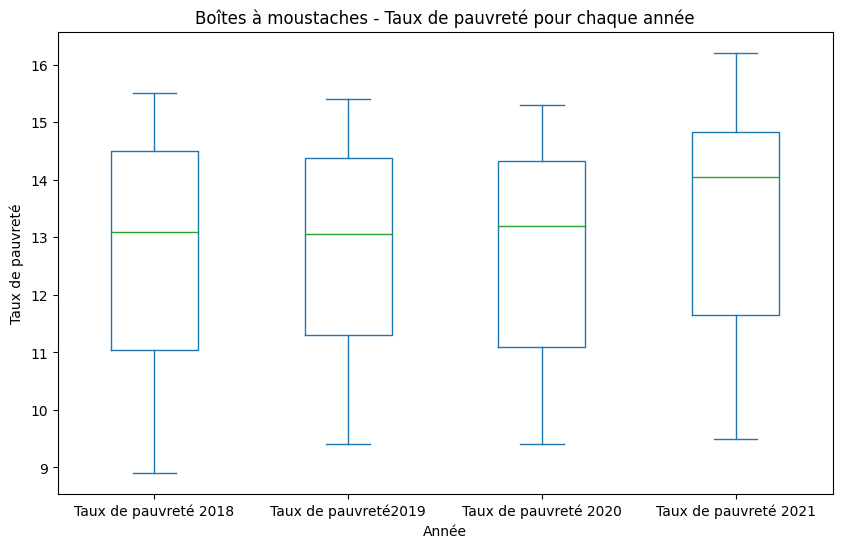

In [67]:
# Sélectionner les colonnes contenant "Taux de pauvreté" pour chaque année
colonnes_pauvrete = donnees_finales.filter(like='Taux de pauvreté').columns

# Tracer les boîtes à moustaches pour les données "Taux de pauvreté" pour chaque année
donnees_finales[colonnes_pauvrete].plot(kind='box', figsize=(10, 6))
plt.title("Boîtes à moustaches - Taux de pauvreté pour chaque année")
plt.xlabel("Année")
plt.ylabel("Taux de pauvreté")
plt.show()

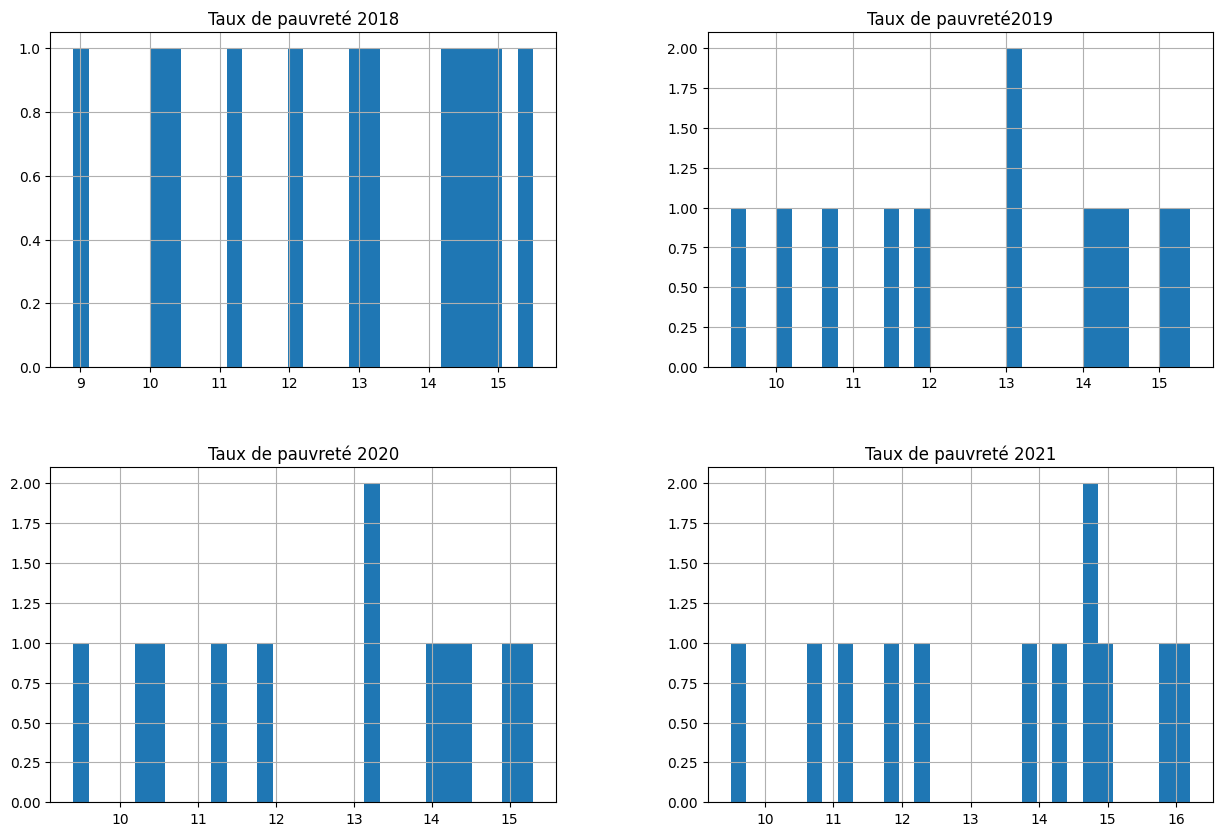

In [68]:
# Histogrammes
donnees_finales[colonnes_pauvrete].hist(bins=30, figsize=(15,10))
plt.show()

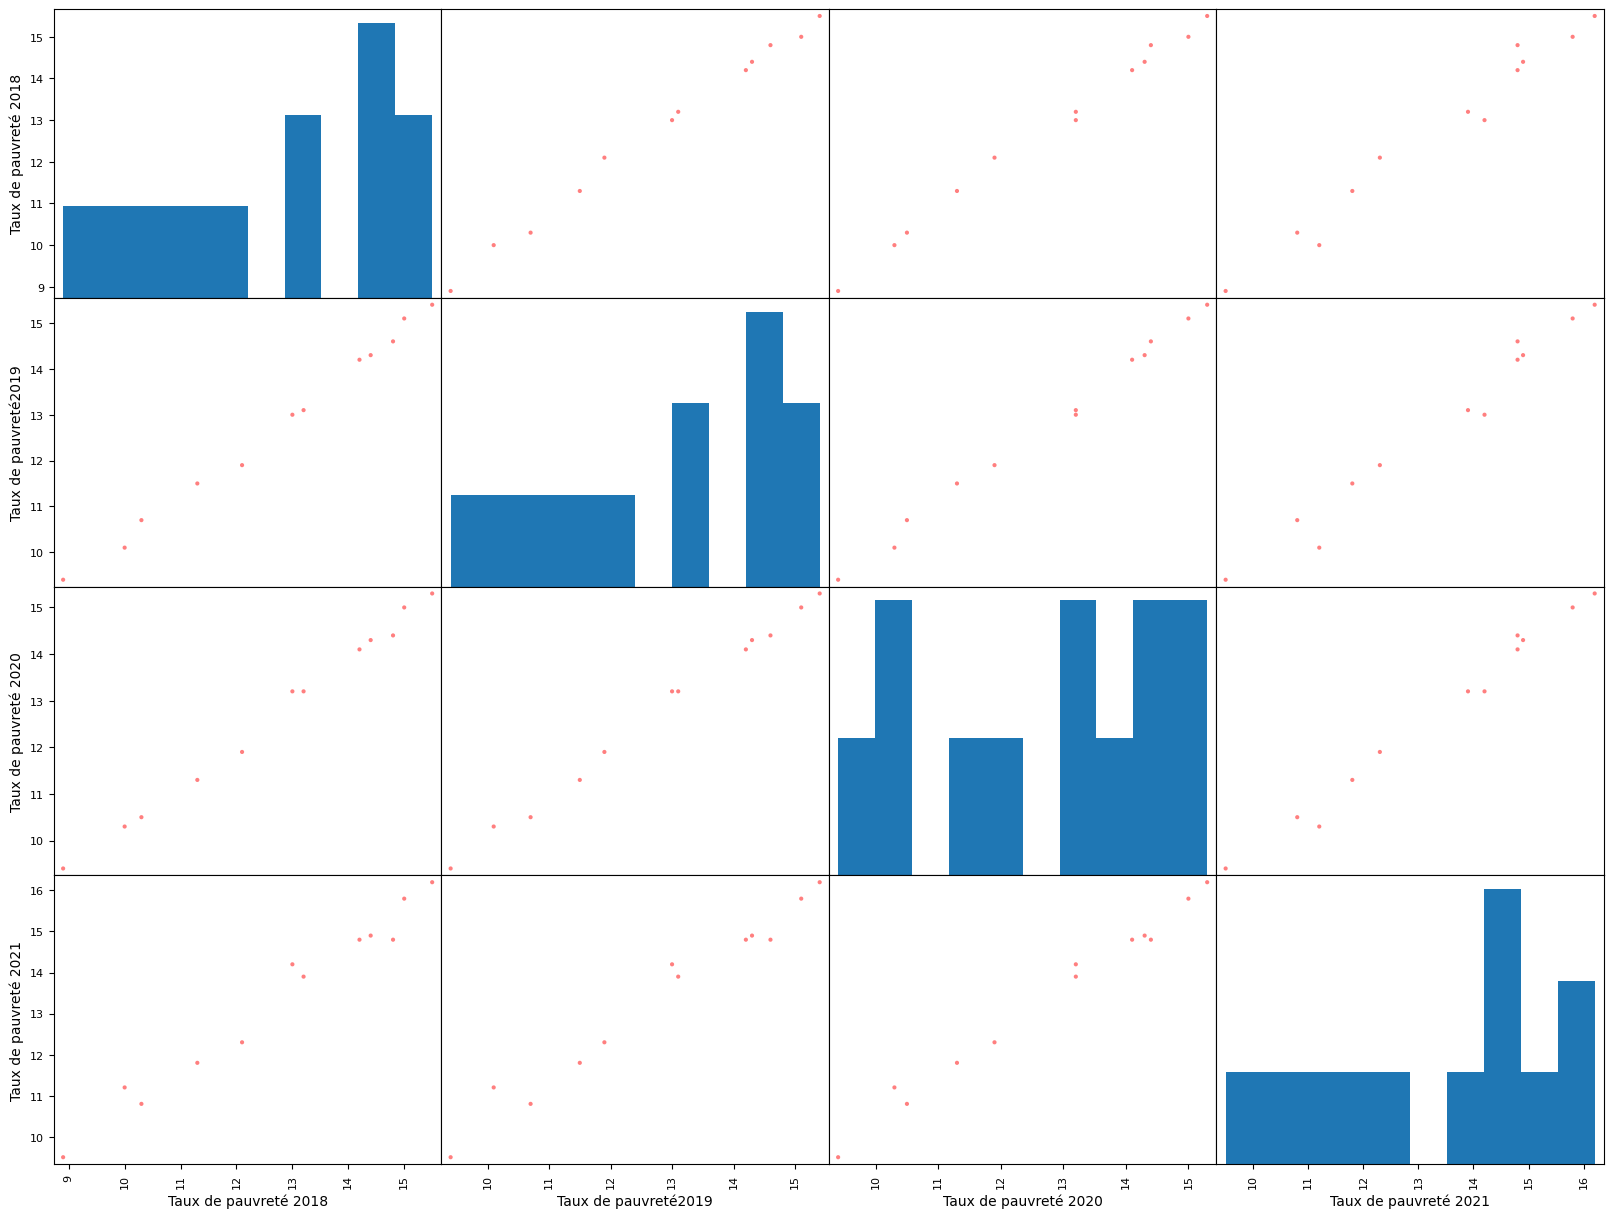

In [69]:
# Scatter plot
scatter_matrix(donnees_finales[colonnes_pauvrete], figsize=(20, 15), color='red')
plt.show()

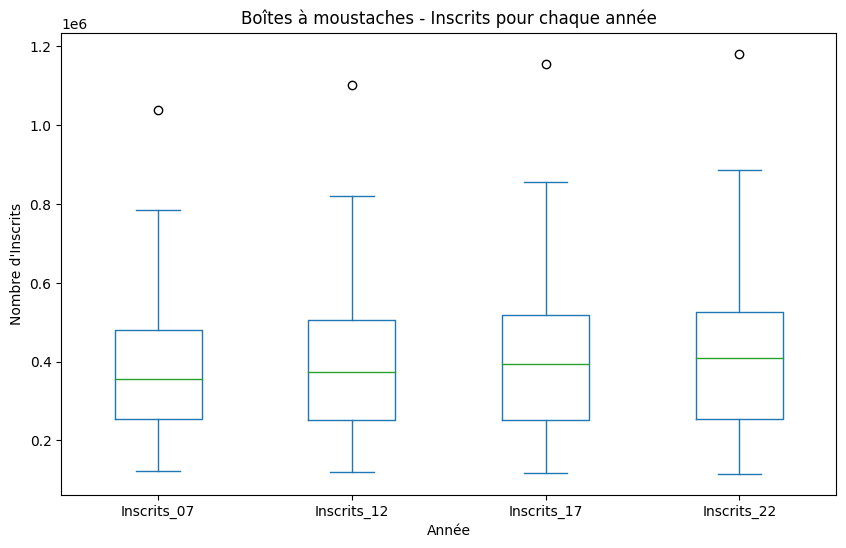

In [70]:


# Sélectionner les colonnes contenant "Inscrits" pour chaque année
colonnes_inscrits = donnees_finales.filter(like='Inscrits').columns

# Tracer les boîtes à moustaches pour les données "Inscrits" pour chaque année
donnees_finales[colonnes_inscrits].plot(kind='box', figsize=(10, 6))
plt.title("Boîtes à moustaches - Inscrits pour chaque année")
plt.xlabel("Année")
plt.ylabel("Nombre d'Inscrits")
plt.show()


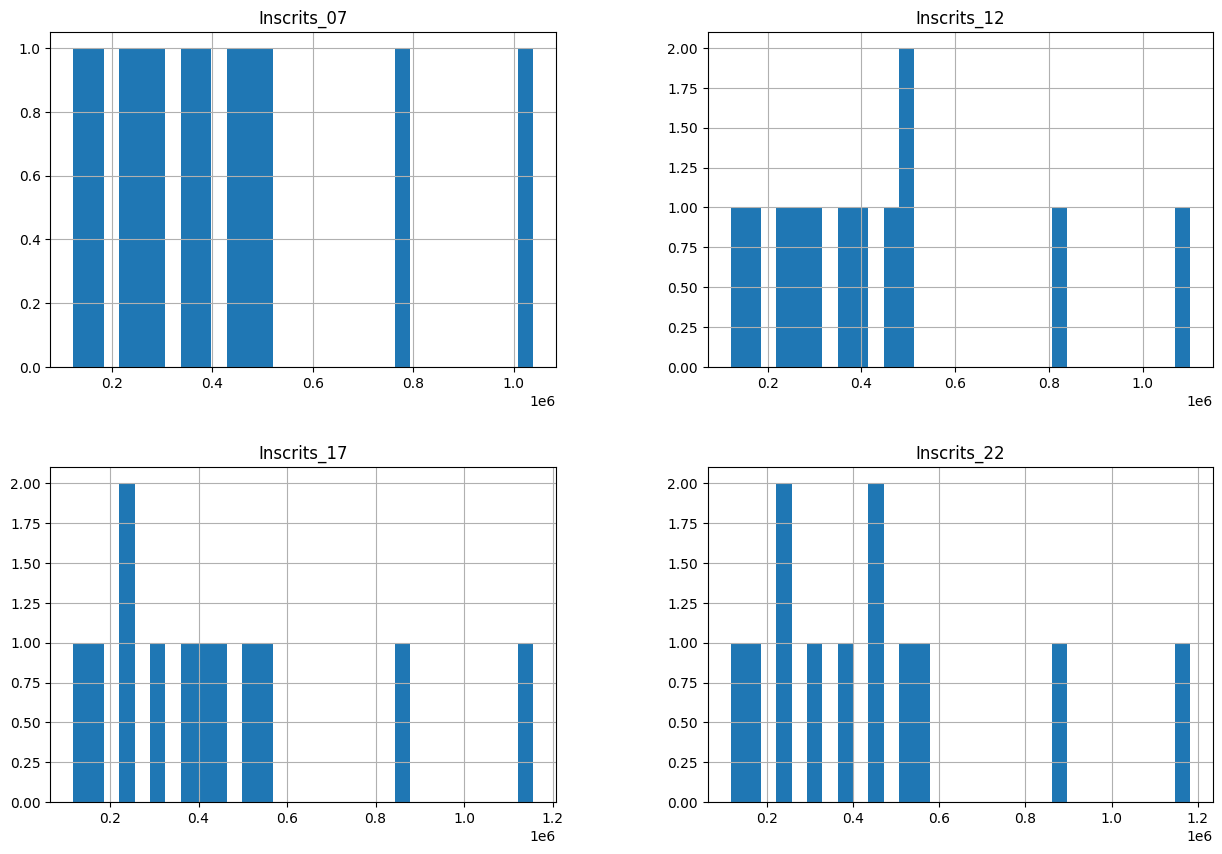

In [71]:
# Histogrammes
donnees_finales[colonnes_inscrits].hist(bins=30, figsize=(15,10))
plt.show()

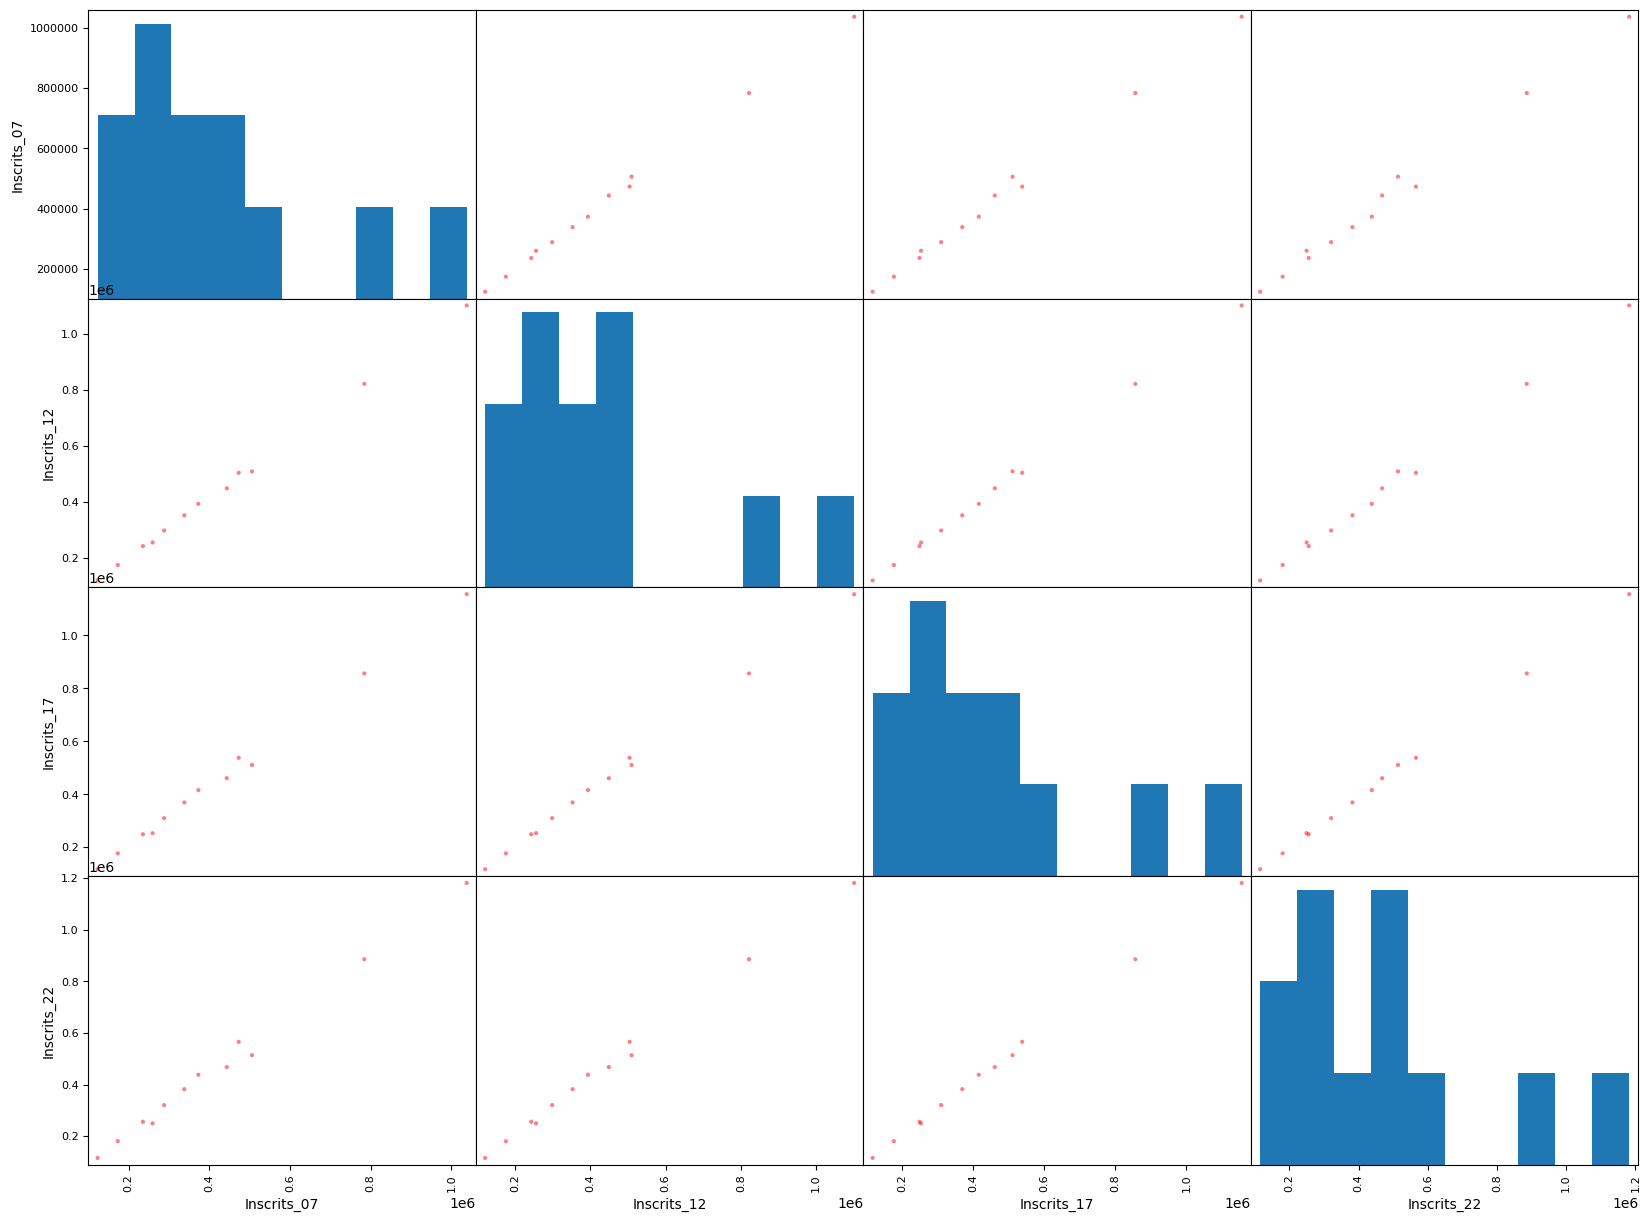

In [72]:
# Scatter plot
scatter_matrix(donnees_finales[colonnes_inscrits], figsize=(20, 15), color='red')
plt.show()

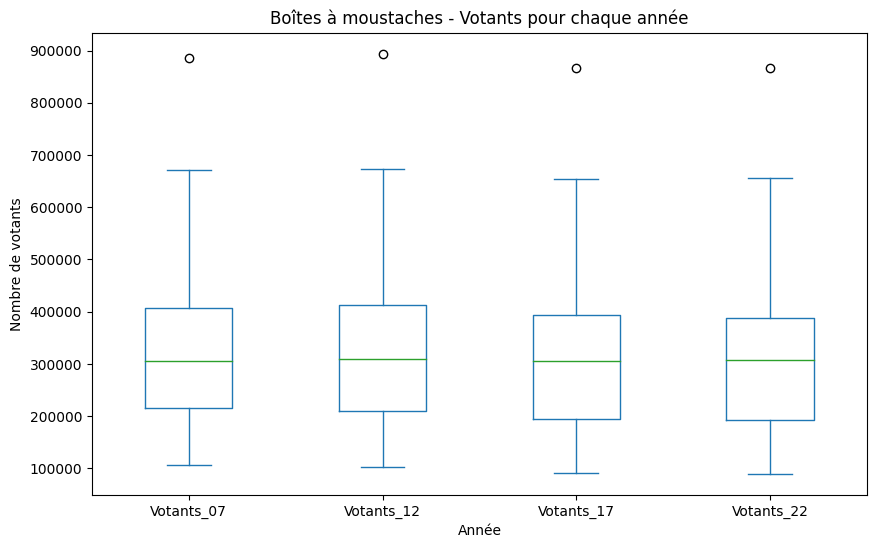

In [73]:


# Sélectionner les colonnes contenant "votants" pour chaque année
colonnes_votants = donnees_finales.filter(like='Votants').columns

# Tracer les boîtes à moustaches pour les données "Inscrits" pour chaque année
donnees_finales[colonnes_votants].plot(kind='box', figsize=(10, 6))
plt.title("Boîtes à moustaches - Votants pour chaque année")
plt.xlabel("Année")
plt.ylabel("Nombre de votants")
plt.show()



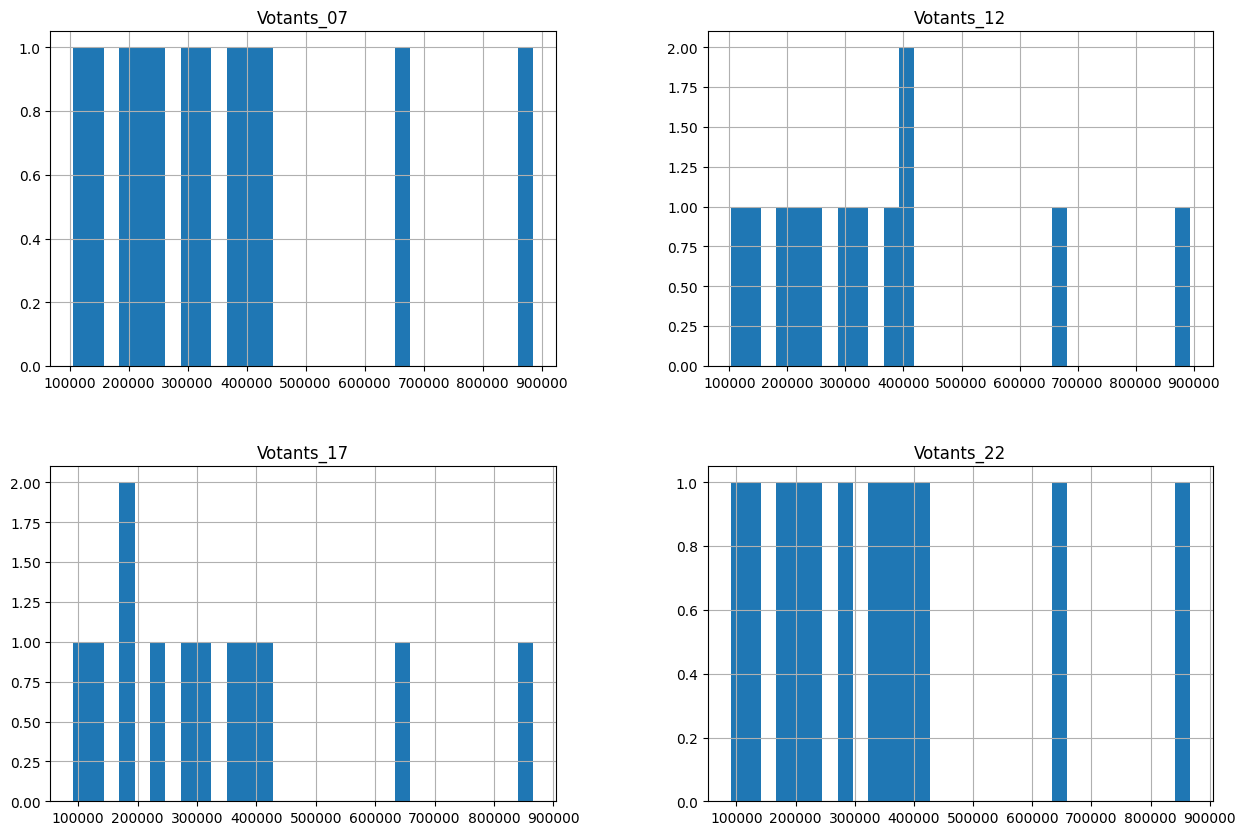

In [74]:
# Histogrammes
donnees_finales[colonnes_votants].hist(bins=30, figsize=(15,10))
plt.show()


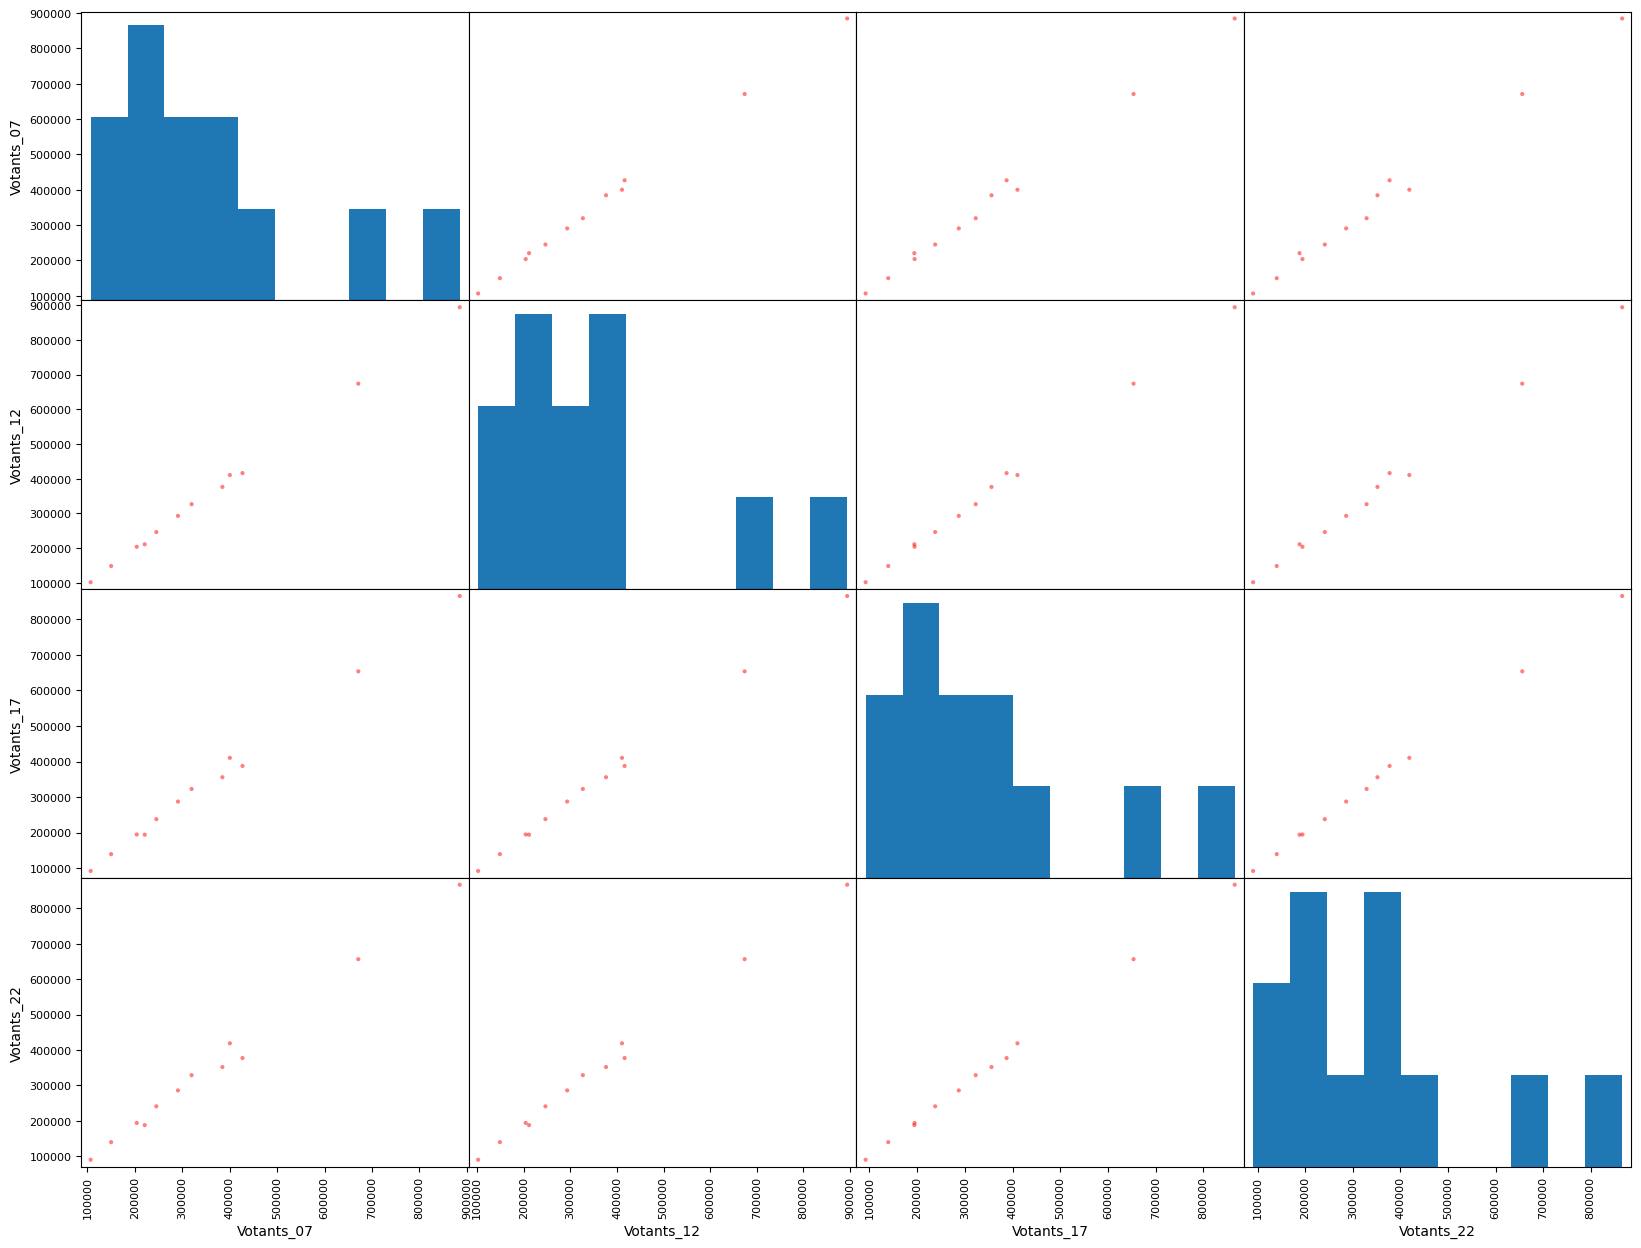

In [75]:
# Scatter plot
scatter_matrix(donnees_finales[colonnes_votants], figsize=(20, 15), color='red')
plt.show()

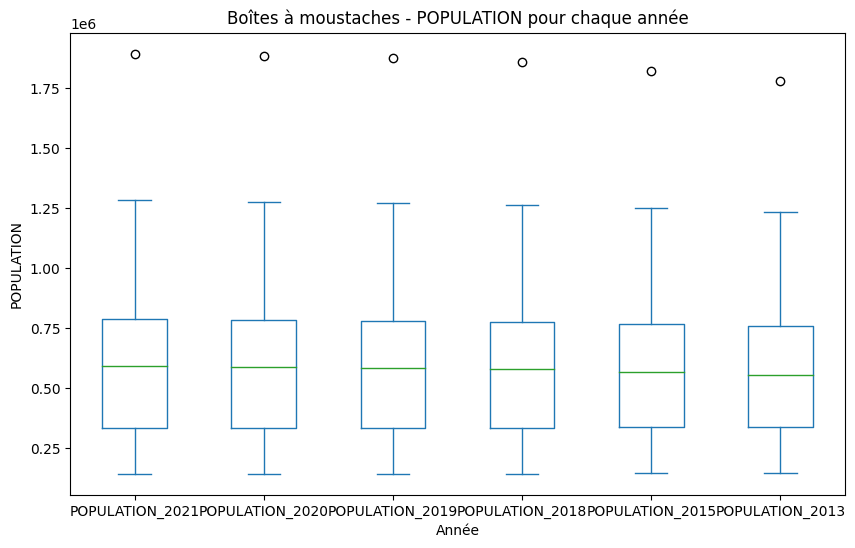

In [76]:
# Sélectionner les colonnes contenant "population" pour chaque année
colonnes_population = donnees_finales.filter(like='POPULATION').columns

# Tracer les boîtes à moustaches pour les données "population" pour chaque année
donnees_finales[colonnes_population].plot(kind='box', figsize=(10, 6))
plt.title("Boîtes à moustaches - POPULATION pour chaque année")
plt.xlabel("Année")
plt.ylabel("POPULATION")
plt.show()

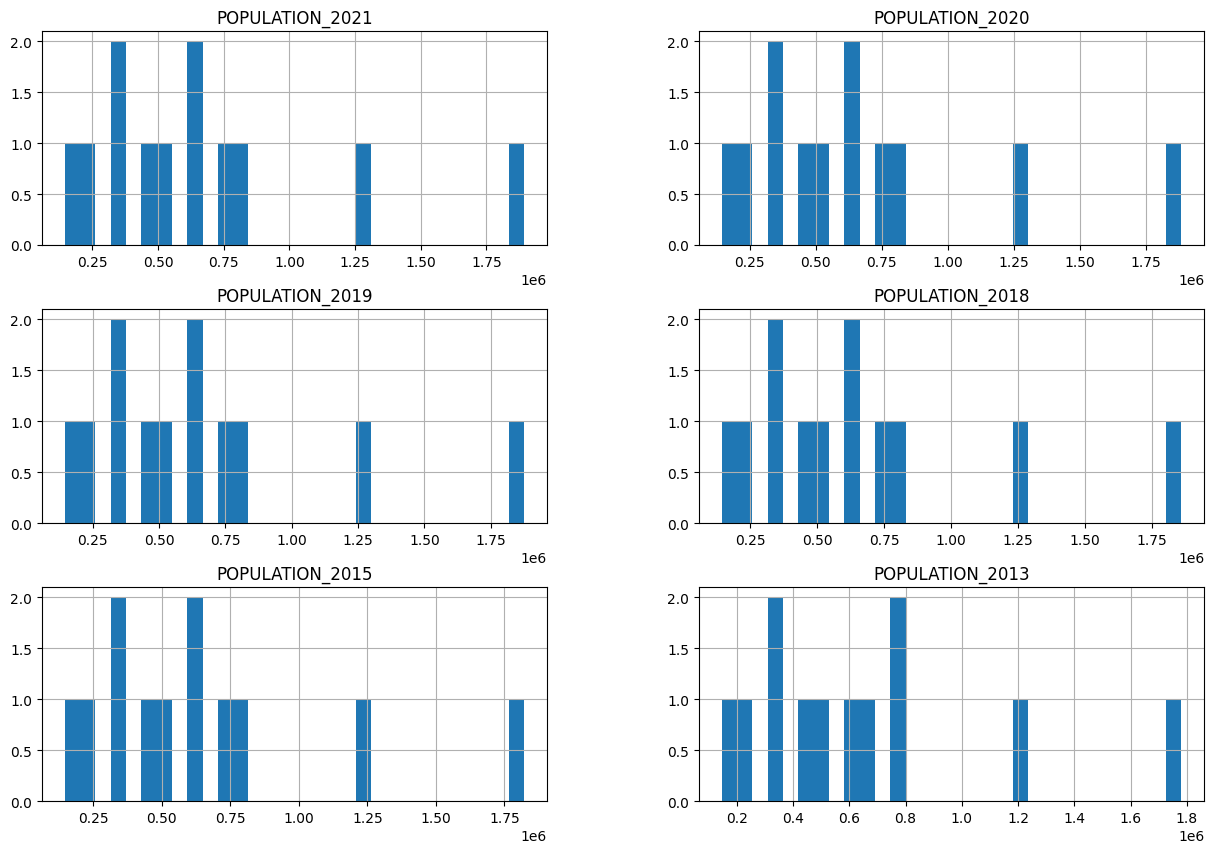

In [77]:
# Histogrammes
donnees_finales[colonnes_population].hist(bins=30, figsize=(15,10))
plt.show()


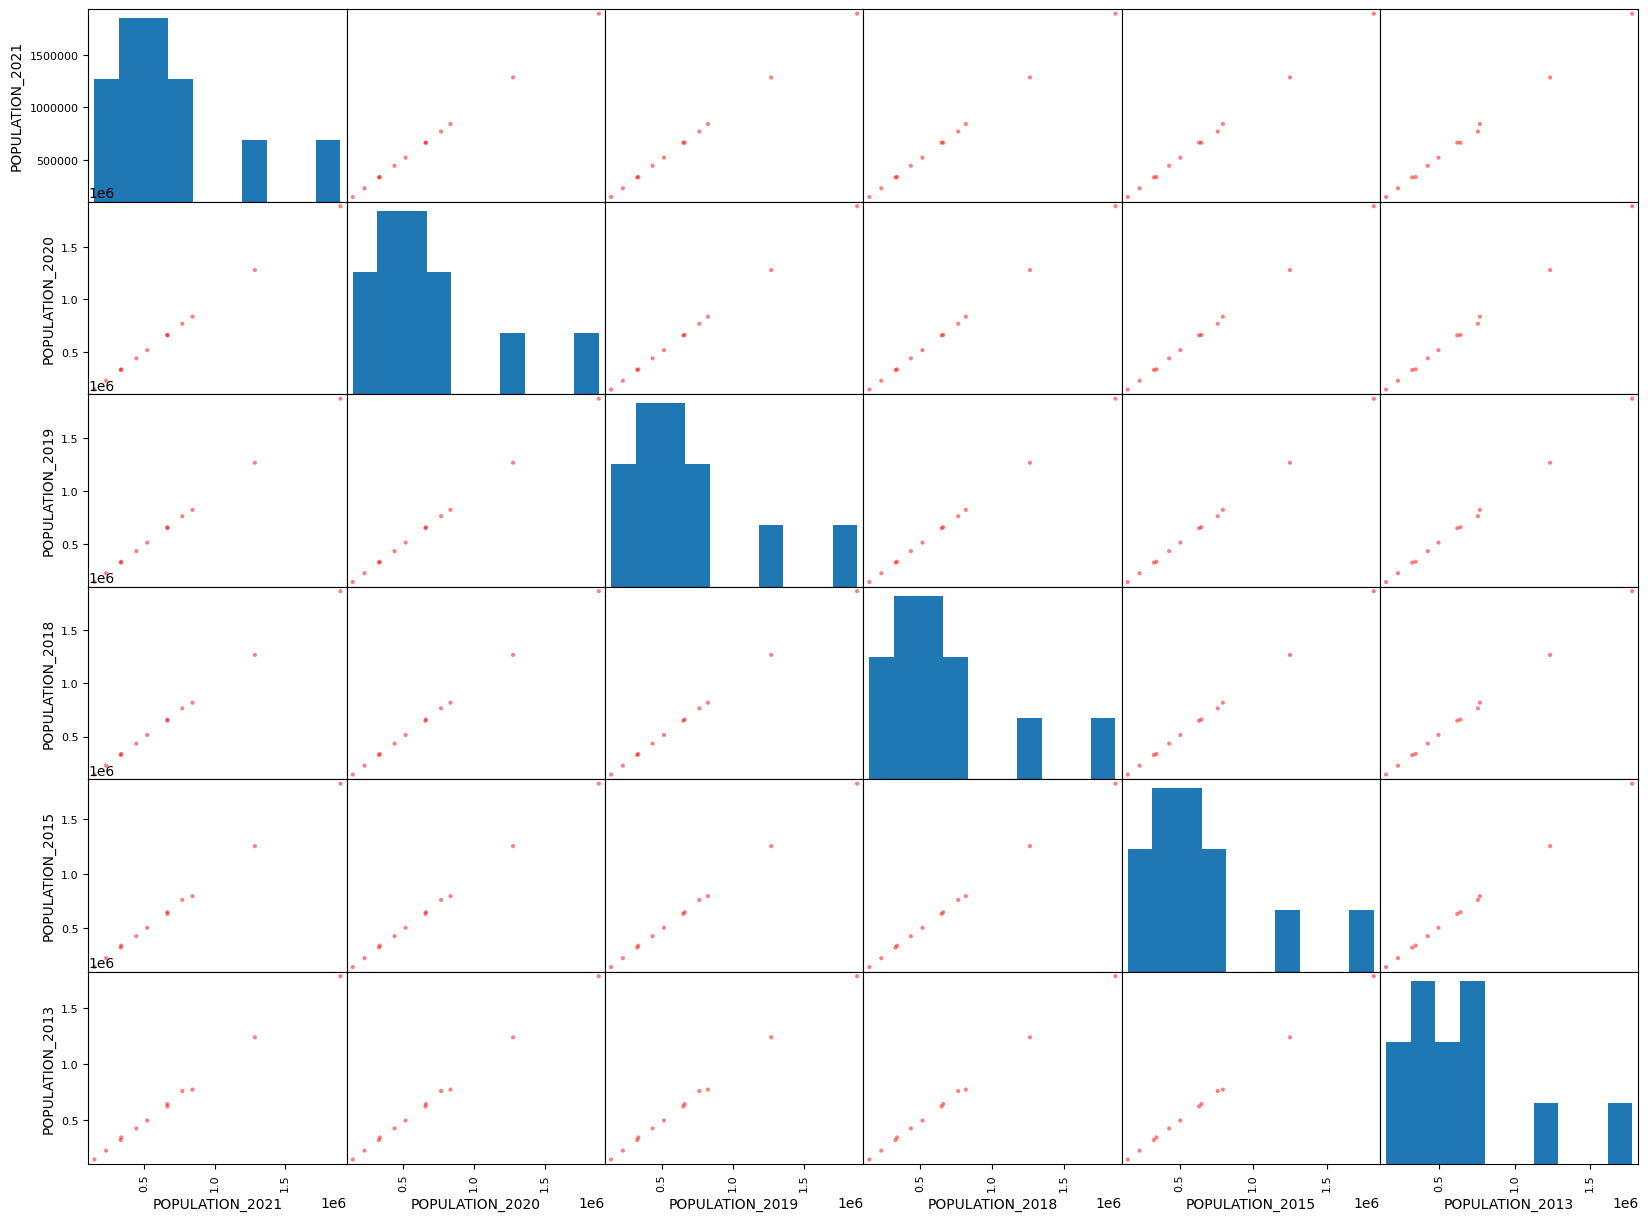

In [78]:
# Scatter plot
scatter_matrix(donnees_finales[colonnes_population], figsize=(20, 15), color='red')
plt.show()

In [79]:
# Créer une liste des années d'intérêt
annees = ['07', '12', '17', '22']

# Créer un dictionnaire pour stocker les sommes des inscrits par année
somme_inscrits_par_annee = {}

# Calculer la somme des inscrits pour chaque année
for annee in annees:
    colonne_inscrits = f'Inscrits_{annee}'
    somme_inscrits_par_annee[annee] = donnees_finales[colonne_inscrits].sum()

# Afficher la somme des inscrits pour chaque année
for annee, somme_inscrits in somme_inscrits_par_annee.items():
    print(f"Somme des inscrits pour l'année 20{annee}: {somme_inscrits}")


Somme des inscrits pour l'année 2007: 5034947
Somme des inscrits pour l'année 2012: 5228484
Somme des inscrits pour l'année 2017: 5414461
Somme des inscrits pour l'année 2022: 5559227


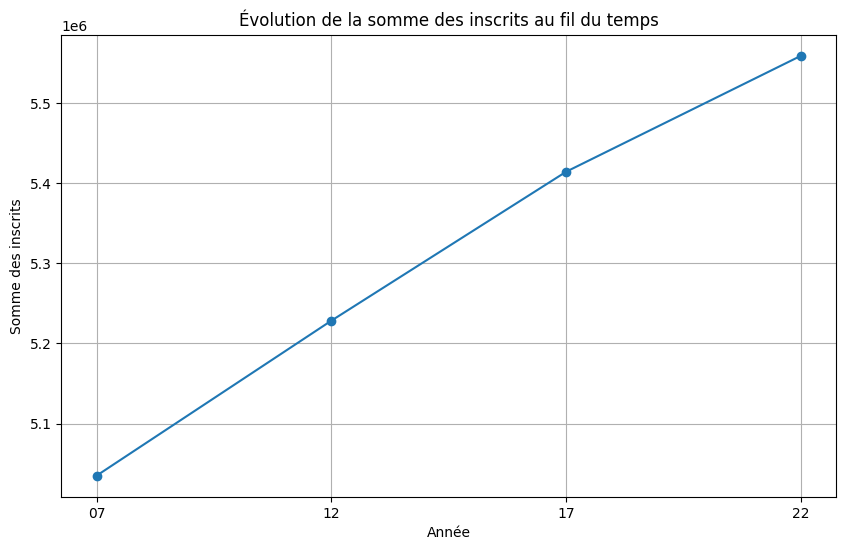

In [80]:
# Créer une liste des années d'intérêt
annees = ['07', '12', '17', '22']

# Créer une liste pour stocker les sommes des inscrits par année
somme_inscrits = []

# Calculer la somme des inscrits pour chaque année
for annee in annees:
    colonne_inscrits = f'Inscrits_{annee}'
    somme_inscrits.append(donnees_finales[colonne_inscrits].sum())

# Tracer l'évolution de la somme des inscrits au fil du temps
plt.figure(figsize=(10, 6))
plt.plot(annees, somme_inscrits, marker='o')
plt.xlabel('Année')
plt.ylabel('Somme des inscrits')
plt.title('Évolution de la somme des inscrits au fil du temps')
plt.grid(True)
plt.show()


In [81]:
# Sélection des caractéristiques
features = ["Inscrits", "Abstentions", "% Abs/Ins", "Votants", "% Vot/Ins", 
            "Blancs et nuls", "% BlNuls/Ins", "% BlNuls/Vot",
            "POPULATION_2021", "POPULATION_2020", "POPULATION_2019", "POPULATION_2018", 
            "POPULATION_2015", "POPULATION_2013", "T4_2022", "T4_2021", "T4_2020"]

In [207]:
donnees_finales["% Abs/Ins_07"] = donnees_finales["% Abs/Ins_07"].str.replace(",", ".").astype(float)
donnees_finales["% Vot/Ins_07"] = donnees_finales["% Vot/Ins_07"].str.replace(",", ".").astype(float)
donnees_finales["% BlNuls/Ins_07"] = donnees_finales["% BlNuls/Ins_07"].str.replace(",", ".").astype(float)
donnees_finales["% BlNuls/Vot_07"] = donnees_finales["% BlNuls/Vot_07"].str.replace(",", ".").astype(float)

In [208]:
# Import des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [209]:
import pandas as pd


# Calculez la somme des inscrits pour chaque année et affichez-la
somme_inscrits_07 = donnees_finales['Inscrits_07'].sum()
somme_inscrits_12 = donnees_finales['Inscrits_12'].sum()
somme_inscrits_17 = donnees_finales['Inscrits_17'].sum()
somme_inscrits_22 = donnees_finales['Inscrits_22'].sum()

print("Somme des inscrits pour l'année 2007 :", somme_inscrits_07)
print("Somme des inscrits pour l'année 2012 :", somme_inscrits_12)
print("Somme des inscrits pour l'année 2017 :", somme_inscrits_17)
print("Somme des inscrits pour l'année 2022 :", somme_inscrits_22)



Somme des inscrits pour l'année 2007 : 5034947
Somme des inscrits pour l'année 2012 : 5228484
Somme des inscrits pour l'année 2017 : 5414461
Somme des inscrits pour l'année 2022 : 5559227


In [210]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Supposons que vous ayez les données dans un DataFrame nommé "donnees_finales"
# avec les colonnes "Libellé du département", "Inscrits_07", "Inscrits_12", "Inscrits_17" et "Inscrits_22"
# contenant respectivement le code départemental et le nombre d'inscrits pour les années 2007, 2012, 2017 et 2022.

# Sélectionner les colonnes pertinentes
donnees = donnees_finales[['Libellé du département', 'Inscrits_07', 'Inscrits_12', 'Inscrits_17', 'Inscrits_22']]

# Créer un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(columns=['Libellé du département', 'Prédiction pour 2025', 'Prédiction pour 2027', 'Prédiction pour 2029'])

# Créer le modèle de régression linéaire
model = LinearRegression()

# Boucler à travers chaque département
for code_departement in donnees['Libellé du département'].unique():
    # Sélectionner les données spécifiques au département
    donnees_departement = donnees[donnees['Libellé du département'] == code_departement]
    
    # Sélectionner les années d'inscription et les inscrits correspondants
    X = [[2007], [2012], [2017], [2022]]
    y = donnees_departement[['Inscrits_07', 'Inscrits_12', 'Inscrits_17', 'Inscrits_22']].values.flatten()
    
    # Entraîner le modèle
    model.fit(X, y)
    
    # Prédire le nombre d'inscrits pour l'année 2025
    prediction_2025 = model.predict([[2025]])[0]
    
    # Prédire le nombre d'inscrits pour l'année 2027
    prediction_2026 = model.predict([[2026]])[0]
    
    # Prédire le nombre d'inscrits pour l'année 2029
    prediction_2027 = model.predict([[2027]])[0]
    
    # Ajouter les prédictions au DataFrame de prédictions
    predictions_df = predictions_df.append({'Libellé du département': code_departement, 
                                            'Prédiction pour 2025': prediction_2025, 
                                            'Prédiction pour 2026': prediction_2026, 
                                            'Prédiction pour 2027': prediction_2027}, 
                                           ignore_index=True)

# Afficher les prédictions
print(predictions_df)


   Libellé du département  Prédiction pour 2025  Prédiction pour 2027  \
0                     AIN             451030.26              459749.5   
1                  ALLIER             248197.16              246942.0   
2                 ARDECHE             260085.96              262767.0   
3                  CANTAL             113828.20              112777.0   
4                   DROME             391997.88              397951.0   
5                   ISERE             908373.46              921971.5   
6                   LOIRE             515444.28              516457.0   
7             HAUTE LOIRE             181705.00              182643.0   
8             PUY DE DOME             473504.66              476950.5   
9                   RHONE            1221137.52             1240583.0   
10                 SAVOIE             327410.20              331780.0   
11           HAUTE SAVOIE             585916.74              598412.5   

   Prédiction pour 2029  Prédiction pour 2026  
0 

C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\3255387935.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Libellé du département': code_departement,
C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\3255387935.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Libellé du département': code_departement,
C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\3255387935.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Libellé du département': code_departement,
C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\3255387935.py:39: FutureWarning: The frame.append method is deprecated and will b

In [211]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Supposons que vous ayez les données dans un DataFrame nommé "donnees_finales"
# avec les colonnes "Libellé du département", "Inscrits_07", "Inscrits_12", "Inscrits_17" et "Inscrits_22"
# contenant respectivement le code départemental et le nombre d'inscrits pour les années 2007, 2012, 2017 et 2022.

# Sélectionner les colonnes pertinentes
donnees = donnees_finales[['Libellé du département', 'Inscrits_07', 'Inscrits_12', 'Inscrits_17', 'Inscrits_22']]

# Créer un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(columns=['Libellé du département', 'Prédiction pour 2025', 'Prédiction pour 2026', 'Prédiction pour 2027'])

# Créer le modèle de régression linéaire
model = LinearRegression()

# Boucler à travers chaque département
for code_departement in donnees['Libellé du département'].unique():
    # Sélectionner les données spécifiques au département
    donnees_departement = donnees[donnees['Libellé du département'] == code_departement]
    
    # Sélectionner les années d'inscription et les inscrits correspondants
    X = [[2007], [2012], [2017], [2022]]
    y = donnees_departement[['Inscrits_07', 'Inscrits_12', 'Inscrits_17', 'Inscrits_22']].values.flatten()
    
    # Entraîner le modèle
    model.fit(X, y)
    
    # Prédire le nombre d'inscrits pour l'année 2025
    prediction_2025 = model.predict([[2025]])[0]
    
    # Prédire le nombre d'inscrits pour l'année 2026
    prediction_2026 = model.predict([[2026]])[0]
    
    # Prédire le nombre d'inscrits pour l'année 2027
    prediction_2027 = model.predict([[2027]])[0]
    
    # Ajouter les prédictions au DataFrame de prédictions
    predictions_df = predictions_df.append({'Libellé du département': code_departement, 
                                            'Prédiction pour 2025': prediction_2025, 
                                            'Prédiction pour 2026': prediction_2026, 
                                            'Prédiction pour 2027': prediction_2027}, 
                                           ignore_index=True)

# Afficher les prédictions
print(predictions_df)


   Libellé du département  Prédiction pour 2025  Prédiction pour 2026  \
0                     AIN             451030.26             455389.88   
1                  ALLIER             248197.16             247569.58   
2                 ARDECHE             260085.96             261426.48   
3                  CANTAL             113828.20             113302.60   
4                   DROME             391997.88             394974.44   
5                   ISERE             908373.46             915172.48   
6                   LOIRE             515444.28             515950.64   
7             HAUTE LOIRE             181705.00             182174.00   
8             PUY DE DOME             473504.66             475227.58   
9                   RHONE            1221137.52            1230860.26   
10                 SAVOIE             327410.20             329595.10   
11           HAUTE SAVOIE             585916.74             592164.62   

    Prédiction pour 2027  
0               459749.

C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\3702218001.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Libellé du département': code_departement,
C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\3702218001.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Libellé du département': code_departement,
C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\3702218001.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Libellé du département': code_departement,
C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\3702218001.py:39: FutureWarning: The frame.append method is deprecated and will b

In [212]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Supposons que vous ayez les données dans un DataFrame nommé "donnees_finales"
# avec les colonnes "Libellé du département", "Inscrits_07", "Inscrits_12", "Inscrits_17" et "Inscrits_22"
# contenant respectivement le code départemental et le nombre d'inscrits pour les années 2007, 2012, 2017 et 2022.

# Sélectionner les colonnes pertinentes
donnees = donnees_finales[['Libellé du département', 'Inscrits_07', 'Inscrits_12', 'Inscrits_17', 'Inscrits_22']]

# Créer un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(columns=['Libellé du département', 'Prédiction pour 2025', 'Prédiction pour 2027', 'Prédiction pour 2029'])

# Créer le modèle de régression linéaire
model = LinearRegression()

# Boucler à travers chaque département
for code_departement in donnees['Libellé du département'].unique():
    # Sélectionner les données spécifiques au département
    donnees_departement = donnees[donnees['Libellé du département'] == code_departement]
    
    # Sélectionner les années d'inscription et les inscrits correspondants
    X = [[2007], [2012], [2017], [2022]]
    y = donnees_departement[['Inscrits_07', 'Inscrits_12', 'Inscrits_17', 'Inscrits_22']].values.flatten()
    
    # Entraîner le modèle
    model.fit(X, y)
    
    # Prédire le nombre d'inscrits pour l'année 2025
    prediction_2025 = model.predict([[2025]])[0]
    
    # Prédire le nombre d'inscrits pour l'année 2027
    prediction_2027 = model.predict([[2027]])[0]
    
    # Prédire le nombre d'inscrits pour l'année 2029
    prediction_2029 = model.predict([[2029]])[0]
    
    # Ajouter les prédictions au DataFrame de prédictions
    predictions_df = predictions_df.append({'Libellé du département': code_departement, 
                                            'Prédiction pour 2025': prediction_2025, 
                                            'Prédiction pour 2027': prediction_2027, 
                                            'Prédiction pour 2029': prediction_2029}, 
                                           ignore_index=True)

    # Calculer les prédictions pour les données d'entraînement
    predictions_train = model.predict(X)
    
    # Calculer les métriques d'erreur
    mae = mean_absolute_error(y, predictions_train)
    mse = mean_squared_error(y, predictions_train)
    rmse = mean_squared_error(y, predictions_train, squared=False)  # Utilisation de la fonction avec squared=False pour obtenir RMSE
    r2 = r2_score(y, predictions_train)

    print(f"Métriques d'erreur pour le département {code_departement}:")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Coefficient de détermination (R²):", r2)
    print("------------------------------")

# Afficher les prédictions
print(predictions_df)


Métriques d'erreur pour le département AIN:
Mean Absolute Error (MAE): 346.24999999953434
Mean Squared Error (MSE): 131241.6749997219
Root Mean Squared Error (RMSE): 362.2729288805912
Coefficient de détermination (R²): 0.999779083315462
------------------------------
Métriques d'erreur pour le département ALLIER:
Mean Absolute Error (MAE): 135.29999999998836
Mean Squared Error (MSE): 26275.674999998904
Root Mean Squared Error (RMSE): 162.09773286508022
Coefficient de détermination (R²): 0.9978697061753206
------------------------------
Métriques d'erreur pour le département ARDECHE:
Mean Absolute Error (MAE): 345.9000000000233
Mean Squared Error (MSE): 171969.80000009603
Root Mean Squared Error (RMSE): 414.69241613525566
Coefficient de détermination (R²): 0.9969469941458479
------------------------------
Métriques d'erreur pour le département CANTAL:
Mean Absolute Error (MAE): 319.5
Mean Squared Error (MSE): 148801.5
Root Mean Squared Error (RMSE): 385.7479747192459
Coefficient de déte

C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\680824828.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Libellé du département': code_departement,
C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\680824828.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Libellé du département': code_departement,
C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\680824828.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Libellé du département': code_departement,
C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\680824828.py:40: FutureWarning: The frame.append method is deprecated and will be re

In [322]:

# Sélectionner les colonnes pertinentes
donnees = donnees_finales[['Libellé du département', 'Taux de pauvreté 2018', 'Taux de pauvreté 2020', 'Taux de pauvreté 2021']]

# Créer un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(columns=['Libellé du département', 'Prédiction pour 2025', 'Prédiction pour 2026', 'Prédiction pour 2027'])

# Créer le modèle de régression linéaire
model = LinearRegression()

# Boucler à travers chaque département
for departement in donnees['Libellé du département'].unique():
    # Sélectionner les données spécifiques au département
    donnees_departement = donnees[donnees['Libellé du département'] == departement]
    
    # Sélectionner les années d'inscription et les taux de pauvreté correspondants
    X = donnees_departement[['Taux de pauvreté 2018', 'Taux de pauvreté 2020', 'Taux de pauvreté 2021']]
    y = donnees_departement[['Taux de pauvreté 2018', 'Taux de pauvreté 2020', 'Taux de pauvreté 2021']]
    
    # Entraîner le modèle
    model.fit(X, y)
    
    # Prédire les taux de pauvreté pour les années cibles (2025, 2026, 2027)
    predictions = model.predict([[donnees_departement['Taux de pauvreté 2018'].values[0], 
                                  donnees_departement['Taux de pauvreté 2020'].values[0], 
                                  donnees_departement['Taux de pauvreté 2021'].values[0]]])
    
    # Ajouter les prédictions au DataFrame de prédictions
    predictions_df = predictions_df.append({'Libellé du département': departement, 
                                            'Prédiction pour 2025': predictions[0][0], 
                                            'Prédiction pour 2026': predictions[0][1], 
                                            'Prédiction pour 2027': predictions[0][2]}, 
                                           ignore_index=True)

# Afficher les prédictions
print(predictions_df)



   Libellé du département  Prédiction pour 2025  Prédiction pour 2026  \
0                     AIN                  10.3                  10.5   
1                  ALLIER                  15.5                  15.3   
2                 ARDECHE                  14.4                  14.3   
3                  CANTAL                  13.0                  13.2   
4                   DROME                  14.8                  14.4   
5                   ISERE                  11.3                  11.3   
6                   LOIRE                  15.0                  15.0   
7             HAUTE LOIRE                  12.1                  11.9   
8             PUY DE DOME                  13.2                  13.2   
9                   RHONE                  14.2                  14.1   
10                 SAVOIE                  10.0                  10.3   
11           HAUTE SAVOIE                   8.9                   9.4   

    Prédiction pour 2027  
0                   10.

C:\Users\KAOUTAR\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\3969613335.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Libellé du département': departement,
C:\Users\KAOUTAR\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\3969613335.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Libellé du département': departement,
C:\Users\KAOUTAR\miniconda3\lib\site-packages\sklearn\base.py:

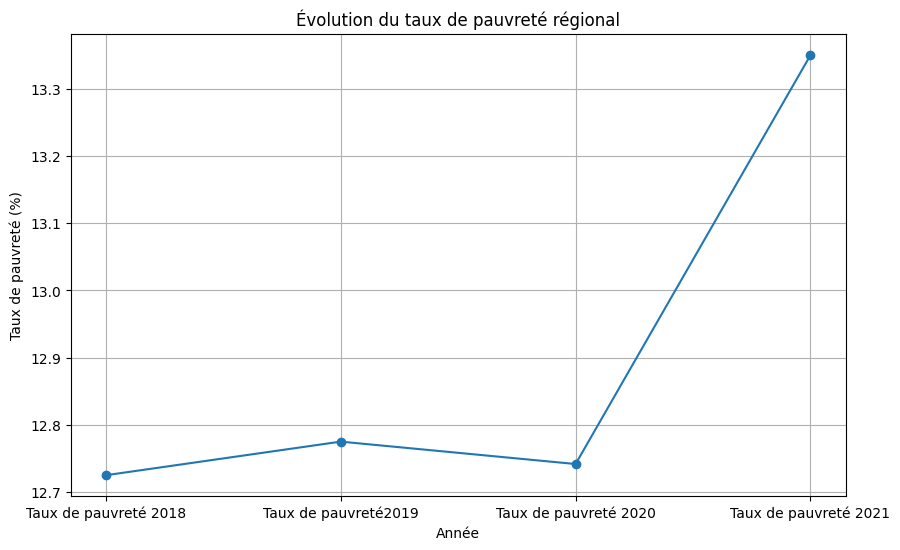

In [82]:

# avec les colonnes "Libellé du département", "Taux de pauvreté 2018", "Taux de pauvreté 2019", "Taux de pauvreté 2021"
# contenant respectivement le code départemental et le taux de pauvreté pour les années 2018, 2019 et 2021.

# Sélectionner les colonnes pertinentes
donnees = donnees_finales[['Taux de pauvreté 2018', 'Taux de pauvreté2019', 'Taux de pauvreté 2020', 'Taux de pauvreté 2021']]

# Calculer le taux de pauvreté régional pour chaque année en faisant la moyenne des taux de pauvreté de tous les départements
taux_pauvrete_regional = donnees.mean(axis=0)

# Créer un DataFrame pour stocker les taux de pauvreté régional
df_taux_pauvrete_regional = pd.DataFrame({'Année': taux_pauvrete_regional.index, 'Taux de pauvreté régional': taux_pauvrete_regional.values})

# Tracer le graphe
plt.figure(figsize=(10, 6))
plt.plot(df_taux_pauvrete_regional['Année'], df_taux_pauvrete_regional['Taux de pauvreté régional'], marker='o', linestyle='-')
plt.title('Évolution du taux de pauvreté régional')
plt.xlabel('Année')
plt.ylabel('Taux de pauvreté (%)')
plt.grid(True)
plt.show()


In [324]:
# avec les colonnes "Libellé du département", "T4_2019", "T4_2020", "T4_2021", "T4_2022".

# Créer un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(columns=['Libellé du département', 'Prédiction pour 2025', 'Prédiction pour 2026', 'Prédiction pour 2027'])

# Créer le modèle de régression linéaire
model = LinearRegression()

# Boucler à travers chaque département
for code_departement in donnees_finales['Libellé du département'].unique():
    # Sélectionner les données spécifiques au département
    donnees_departement = donnees_finales[donnees_finales['Libellé du département'] == code_departement]
    
    # Sélectionner les années de chômage et les taux de chômage correspondants
    X = [[2019], [2020], [2021], [2022]]
    y = donnees_departement[['T4_2019', 'T4_2020', 'T4_2021', 'T4_2022']].values.flatten()
    
    # Entraîner le modèle
    model.fit(X, y)
    
    # Prédire le taux de chômage pour les années 2025, 2026 et 2027
    prediction_2025 = model.predict([[2025]])[0]
    prediction_2026 = model.predict([[2026]])[0]
    prediction_2027 = model.predict([[2027]])[0]
    
    # Ajouter les prédictions au DataFrame de prédictions
    predictions_df = predictions_df.append({'Libellé du département': code_departement, 
                                            'Prédiction pour 2025': prediction_2025, 
                                            'Prédiction pour 2026': prediction_2026, 
                                            'Prédiction pour 2027': prediction_2027}, 
                                           ignore_index=True)

# Afficher les prédictions
print(predictions_df)


   Libellé du département  Prédiction pour 2025  Prédiction pour 2026  \
0                     AIN                  4.74                  4.51   
1                  ALLIER                  6.11                  5.69   
2                 ARDECHE                  6.76                  6.39   
3                  CANTAL                  3.16                  2.89   
4                   DROME                  6.48                  6.07   
5                   ISERE                  4.70                  4.35   
6                   LOIRE                  5.93                  5.57   
7             HAUTE LOIRE                  4.42                  4.08   
8             PUY DE DOME                  5.21                  4.89   
9                   RHONE                  4.92                  4.48   
10                 SAVOIE                  4.08                  3.67   
11           HAUTE SAVOIE                  4.49                  4.16   

    Prédiction pour 2027  
0                   4.2

C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\681419008.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Libellé du département': code_departement,
C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\681419008.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Libellé du département': code_departement,
C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\681419008.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({'Libellé du département': code_departement,
C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\681419008.py:27: FutureWarning: The frame.append method is deprecated and will be re

In [ ]:
# Créer une nouvelle colonne pour stocker le parti gagnant pour chaque année
donnees_finales['Parti_gagnant'] = ""

# Parcourir les lignes pour chaque année
for year in ["07", "12", "17", "22"]:
    # Calculer le total des voix pour chaque parti pour l'année donnée
    total_voix_parti_0 = donnees_finales[f'Voix.0_{year}'].sum()
    total_voix_parti_1 = donnees_finales[f'Voix.1_{year}'].sum()
    
    # Comparer les totaux des voix pour déterminer le parti gagnant
    if total_voix_parti_0 > total_voix_parti_1:
        parti_gagnant = donnees_finales[f'Parti.0_{year}'].iloc[0]
        total_voix_gagnant = total_voix_parti_0
    elif total_voix_parti_0 < total_voix_parti_1:
        parti_gagnant = donnees_finales[f'Parti.1_{year}'].iloc[0]
        total_voix_gagnant = total_voix_parti_1
    else:
        parti_gagnant = "Égalité"
        total_voix_gagnant = total_voix_parti_0  # Ou total_voix_parti_1, car ils sont égaux
    
    # Afficher le parti gagnant pour chaque année
    print(f"Année 20{year}: Parti gagnant: {parti_gagnant}, Total des voix: {total_voix_gagnant}")

# Afficher la somme des voix pour chaque parti
for year in ["07", "12", "17", "22"]:
    total_voix_parti_0 = donnees_finales[f'Voix.0_{year}'].sum()
    total_voix_parti_1 = donnees_finales[f'Voix.1_{year}'].sum()
    nom_parti_0 = donnees_finales[f'Parti.0_{year}'].iloc[0]
    nom_parti_1 = donnees_finales[f'Parti.1_{year}'].iloc[0]
    print(f"Année 20{year}: Total des voix pour {nom_parti_0}: {total_voix_parti_0}, Total des voix pour {nom_parti_1}: {total_voix_parti_1}")


In [ ]:
# Parcourir les lignes pour chaque année
for year in ["07", "12", "17", "22"]:
    # Calculer le total des voix exprimées pour l'année donnée
    total_voix_exprimees = donnees_finales[f'Exprimés_{year}'].sum()
    
    # Calculer le pourcentage de voix pour chaque parti politique
    if total_voix_exprimees > 0:
        pourcentage_parti_0 = (donnees_finales[f'Voix.0_{year}'].sum() / total_voix_exprimees) * 100
        pourcentage_parti_1 = (donnees_finales[f'Voix.1_{year}'].sum() / total_voix_exprimees) * 100
        
        nom_parti_0 = donnees_finales[f'Parti.0_{year}'].iloc[0]
        nom_parti_1 = donnees_finales[f'Parti.1_{year}'].iloc[0]
        
        print(f"Année 20{year}:")
        print(f"Pourcentage de voix pour {nom_parti_0}: {pourcentage_parti_0:.2f}%")
        print(f"Pourcentage de voix pour {nom_parti_1}: {pourcentage_parti_1:.2f}%")
    else:
        print(f"Année 20{year}: Aucun vote exprimé")

# Note : Vous devrez peut-être ajuster le code pour prendre en compte les éventuels votes exprimés nuls ou blancs, si nécessaire.


In [ ]:
# Ajouter les colonnes pour les prédictions des voix en 2026 dans donnees_finales
donnees_finales['Voix.0_26_pred'] = None
donnees_finales['Voix.1_26_pred'] = None
donnees_finales['Voix.2_26_pred'] = None

# Ajouter les colonnes pour les prédictions des voix en 2027 dans donnees_finales
donnees_finales['Voix.0_27_pred'] = None
donnees_finales['Voix.1_27_pred'] = None
donnees_finales['Voix.2_27_pred'] = None


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Supposons que vous avez un DataFrame appelé donnees_finales avec les colonnes nécessaires

# Sélectionner les données pertinentes pour l'entraînement du modèle
X_train = donnees_finales[['Taux de pauvreté 2018', 'Taux de pauvreté 2020', 'T4_2019', 'T4_2020', 'Parti.0_07', 'Parti.1_07', 'Voix.0_07', 'Voix.1_07']]
y_train = donnees_finales[['Voix.0_12', 'Voix.1_12', 'Voix.1_12']]

# Créer le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions pour les années 2025, 2026 et 2027
X_pred = donnees_finales[['Taux de pauvreté 2020', 'Taux de pauvreté 2021', 'T4_2021', 'T4_2022', 'Parti.0_07', 'Parti.1_07', 'Voix.0_07', 'Voix.1_07']]
predictions = model.predict(X_pred)

# Créer un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(predictions, columns=['Voix.0_25_pred', 'Voix.1_25_pred', 'Voix.2_25_pred'])

# Afficher les prédictions pour les votes de chaque parti en 2025
#print("Prédictions des votes pour chaque parti en 2025 :")
print(predictions_df[['Voix.0_25_pred', 'Voix.1_25_pred', 'Voix.2_25_pred']])

# Afficher les prédictions pour les votes de chaque parti en 2026
#print("Prédictions des votes pour chaque parti en 2026 :")
#print(predictions_df[['Voix.0_26_pred', 'Voix.1_26_pred', 'Voix.2_26_pred']])

# Afficher les prédictions pour les votes de chaque parti en 2027
#print("Prédictions des votes pour chaque parti en 2027 :")
#print(predictions_df[['Voix.0_27_pred', 'Voix.1_27_pred', 'Voix.2_27_pred']])


In [ ]:
from sklearn.linear_model import LinearRegression

# Sélectionner les données pertinentes pour l'entraînement du modèle
X_train = donnees_finales[['Taux de pauvreté 2018', 'Taux de pauvreté 2020', 'T4_2019', 'T4_2020', 'Parti.0_07', 'Parti.1_07', 'Voix.0_07', 'Voix.1_07']]
y_train = donnees_finales[['Voix.0_12', 'Voix.1_12', 'Voix.1_22']]

# Créer le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions pour les années 2025, 2026 et 2027
X_pred = donnees_finales[['Taux de pauvreté 2020', 'Taux de pauvreté 2021', 'T4_2021', 'T4_2022', 'Parti.0_07', 'Parti.1_07', 'Voix.0_07', 'Voix.1_07']]
predictions = model.predict(X_pred)

# Créer un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(predictions, columns=['Voix.0_25_pred', 'Voix.1_25_pred', 'Voix.2_25_pred'])

# Afficher les prédictions pour les votes de chaque parti en 2025
print("Prédictions des votes pour chaque parti en 2025 :")
print(predictions_df[['Voix.0_25_pred', 'Voix.1_25_pred', 'Voix.2_25_pred']])
# Ajouter les colonnes de libellé de département et de parti à predictions_df
predictions_df['Libellé du département'] = donnees_finales['Libellé du département']
predictions_df['Parti.0_07'] = donnees_finales['Parti.0_07']
predictions_df['Parti.1_07'] = donnees_finales['Parti.1_07']

# Afficher les prédictions pour les votes de chaque parti en 2025 avec les libellés de département et les partis
print("Prédictions des votes pour chaque parti en 2025 avec les libellés de département et les partis :")
print(predictions_df[['Libellé département', 'Parti.0_07', 'Parti.1_07', 'Voix.0_25_pred', 'Voix.1_25_pred', 'Voix.2_25_pred']])



In [ ]:
# Import des bibliothèques nécessaires
import pandas as pd
from sklearn.linear_model import LinearRegression

# Supposons que vous avez un DataFrame appelé donnees_finales avec les colonnes nécessaires

# Diviser les données en ensembles d'entraînement et de test
train_data = donnees_finales[donnees_finales['Année élection'].isin([2007, 2012, 2017])]
test_data = donnees_finales[donnees_finales['Année élection'] == 2022]

# Sélectionner les données pertinentes pour l'entraînement du modèle
X_train = train_data[['Taux de pauvreté 2018', 'Taux de pauvreté 2020', 'T4_2019', 'T4_2020', 'Parti.0_07', 'Parti.1_07', 'Voix.0_07', 'Voix.1_07']]
y_train = train_data[['Voix.0_22', 'Voix.1_22', 'Voix.2_22']]

# Créer le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions pour les années 2025, 2026 et 2027
X_pred = test_data[['Taux de pauvreté 2020', 'Taux de pauvreté 2021', 'T4_2021', 'T4_2022', 'Parti.0_07', 'Parti.1_07', 'Voix.0_07', 'Voix.1_07']]
predictions = model.predict(X_pred)

# Créer un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(predictions, columns=['Voix.0_25_pred', 'Voix.1_25_pred', 'Voix.2_25_pred'])

# Ajouter les libellés de département et les noms de parti politique à predictions_df
predictions_df['Libellé du département'] = test_data['Libellé du département']
predictions_df['Parti.0_07'] = test_data['Parti.0_07']
predictions_df['Parti.1_07'] = test_data['Parti.1_07']

# Afficher les prédictions pour les votes de chaque parti en 2025 avec les libellés de département et les noms de parti politique
print("Prédictions des votes pour chaque parti en 2025 par département et par parti politique :")
print(predictions_df[['Libellé du département', 'Parti.0_07', 'Parti.1_07', 'Voix.0_25_pred', 'Voix.1_25_pred', 'Voix.2_25_pred']])


In [224]:
import pandas as pd

# Créer une nouvelle colonne 'Résultat_2025' dans le DataFrame donnees_finales et initialiser toutes ses valeurs à zéro
donnees_finales['Résultat_2025'] = 0

# Afficher les données finales avec la nouvelle colonne ajoutée
print(donnees_finales)



    Code du département Libellé du département  Inscrits_07  Abstentions_07  \
0                     1                    AIN       372951           53428   
1                     3                 ALLIER       259503           38826   
2                     7                ARDECHE       235544           31610   
3                    15                 CANTAL       123322           16704   
4                    26                  DROME       338120           47344   
5                    38                  ISERE       784163          113070   
6                    42                  LOIRE       505913           79025   
7                    43            HAUTE LOIRE       173262           23377   
8                    63            PUY DE DOME       443310           58836   
9                    69                  RHONE      1037922          153002   
10                   73                 SAVOIE       288079           42885   
11                   74           HAUTE SAVOIE      

In [ ]:
# Import des bibliothèques nécessaires
import pandas as pd
from sklearn.linear_model import LinearRegression

# Supposons que vous avez un DataFrame appelé donnees_finales avec les colonnes nécessaires

# Diviser les données en ensembles d'entraînement et de test
train_data = donnees_finales[donnees_finales['Année_07'] | donnees_finales['Année_12'] | donnees_finales['Année_17']]
test_data = donnees_finales[donnees_finales['Année_22']]

# Sélectionner les données pertinentes pour l'entraînement du modèle
X_train = train_data[['Taux de pauvreté 2018', 'Taux de pauvreté 2020', 'T4_2019', 'T4_2020', 'Parti.0_07', 'Parti.1_07', 'Voix.0_07', 'Voix.1_07']]
y_train = train_data[['Voix.0_22', 'Voix.1_22', 'Voix.2_22']]

# Créer le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions pour les années 2025, 2026 et 2027
X_pred = test_data[['Taux de pauvreté 2020', 'Taux de pauvreté 2021', 'T4_2021', 'T4_2022', 'Parti.0_07', 'Parti.1_07', 'Voix.0_07', 'Voix.1_07']]
predictions = model.predict(X_pred)

# Créer un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(predictions, columns=['Voix.0_25_pred', 'Voix.1_25_pred', 'Voix.2_25_pred'])

# Ajouter les libellés de département et les noms de parti politique à predictions_df
predictions_df['Libellé département'] = test_data['Libellé département']
predictions_df['Parti.0_07'] = test_data['Parti.0_07']
predictions_df['Parti.1_07'] = test_data['Parti.1_07']

# Afficher les prédictions pour les votes de chaque parti en 2025 avec les libellés de département et les noms de parti politique
print("Prédictions des votes pour chaque parti en 2025 par département et par parti politique :")
print(predictions_df[['Libellé département', 'Parti.0_07', 'Parti.1_07', 'Voix.0_25_pred', 'Voix.1_25_pred', 'Voix.2_25_pred']])


In [276]:

# Chemin du fichier Excel
chemin_elections = 'Datasets/donnees_elections_annees.xlsx'

# Lire le fichier Excel dans un DataFrame
donnees_elections = pd.read_excel(chemin_elections)

# Afficher les premières lignes du DataFrame pour vérifier
print(donnees_elections.head())


   id_election  Code Libellé du département   Annee  nombre_inscrits  \
0            1     1                     AIN   2007           372951   
1            2     3                  ALLIER   2007           259503   
2            3     7                 ARDECHE   2007           235544   
3            4    15                  CANTAL   2007           123322   
4            5    26                   DROME   2007           338120   

   nombre_abstentions  nombre_blancs_nuls  
0               53428               13670  
1               38826               10809  
2               31610                9399  
3               16704                4429  
4               47344               12910  


In [277]:
# Chemin du fichier Excel
chemin_candidats = 'Datasets/candidats_elections.xlsx'

# Lire le fichier Excel dans un DataFrame
candidats_elections = pd.read_excel(chemin_candidats)

# Afficher les premières lignes du DataFrame pour vérifier
print(candidats_elections.head(10))


   id_candidat  id_election  id_parti_politique      nom   prenom  nombre_voix
0            1            1                   2  SARKOZY  Nicolas       185174
1            2            2                   2  SARKOZY  Nicolas       102426
2            3            3                   2  SARKOZY  Nicolas       100414
3            4            4                   2  SARKOZY  Nicolas        56981
4            5            5                   2  SARKOZY  Nicolas       152482
5            6            6                   2  SARKOZY  Nicolas        77086
6            7            7                   2  SARKOZY  Nicolas       241466
7            8            8                   2  SARKOZY  Nicolas       335314
8            9            9                   2  SARKOZY  Nicolas       221648
9           10           10                   2  SARKOZY  Nicolas       168859


In [278]:
import pandas as pd

# Chemin du fichier Excel
chemin_parti = 'Datasets/Parti_politiques.xlsx'

# Lire le fichier Excel dans un DataFrame
partis_politiques = pd.read_excel(chemin_parti)

# Afficher les premières lignes du DataFrame pour vérifier
print(partis_politiques.head())


   id_parti_politique nom_parti
0                   1        PS
1                   2       UMP
2                   3      LREM
3                   4        FN
4                   5        RN


In [279]:
# Chemin du fichier Excel
chemin_chomage = 'Datasets/donnees_chomage_elections.xlsx'

# Lire le fichier Excel dans un DataFrame
donnees_chomage_elections = pd.read_excel(chemin_chomage)

# Afficher les premières lignes du DataFrame pour vérifier
print(donnees_chomage_elections.head())


   id_chomage  id_election  pourcentage_chomage_T1
0           1            1                     5.2
1           2            2                     8.2
2           3            3                     8.8
3           4            4                     5.9
4           5            5                     8.9


In [280]:
# Fusionner les DataFrames "donnees_elections" et "candidats_elections" sur la colonne "id_election"
donnees_completes = pd.merge(donnees_elections, candidats_elections, on='id_election')

# Afficher les premières lignes du DataFrame fusionné pour vérification
print(donnees_completes.head())


   id_election  Code Libellé du département   Annee  nombre_inscrits  \
0            1     1                     AIN   2007           372951   
1            1     1                     AIN   2007           372951   
2            2     3                  ALLIER   2007           259503   
3            2     3                  ALLIER   2007           259503   
4            3     7                 ARDECHE   2007           235544   

   nombre_abstentions  nombre_blancs_nuls  id_candidat  id_parti_politique  \
0               53428               13670            1                   2   
1               53428               13670           13                   1   
2               38826               10809            2                   2   
3               38826               10809           14                   1   
4               31610                9399            3                   2   

       nom    prenom  nombre_voix  
0  SARKOZY   Nicolas       185174  
1    ROYAL  Ségolène      

In [281]:
# Fusionner les DataFrames "donnees_elections" et "candidats_elections" sur la colonne "id_election"
donnees_completes_partis = pd.merge(donnees_completes , partis_politiques, on='id_parti_politique')

# Afficher les premières lignes du DataFrame fusionné pour vérification
print(donnees_completes_partis.head())


   id_election  Code Libellé du département   Annee  nombre_inscrits  \
0            1     1                     AIN   2007           372951   
1            2     3                  ALLIER   2007           259503   
2            3     7                 ARDECHE   2007           235544   
3            4    15                  CANTAL   2007           123322   
4            5    26                   DROME   2007           338120   

   nombre_abstentions  nombre_blancs_nuls  id_candidat  id_parti_politique  \
0               53428               13670            1                   2   
1               38826               10809            2                   2   
2               31610                9399            3                   2   
3               16704                4429            4                   2   
4               47344               12910            5                   2   

       nom   prenom  nombre_voix nom_parti  
0  SARKOZY  Nicolas       185174       UMP  
1  SARKO

In [282]:
donnees_completes_partis.head(20)

,id_election,Code,Libellé du département,Annee,nombre_inscrits,nombre_abstentions,nombre_blancs_nuls,id_candidat,id_parti_politique,nom,prenom,nombre_voix,nom_parti
0,1,1,AIN,2007,372951,53428,13670,1,2,SARKOZY,Nicolas,185174,UMP
1,2,3,ALLIER,2007,259503,38826,10809,2,2,SARKOZY,Nicolas,102426,UMP
2,3,7,ARDECHE,2007,235544,31610,9399,3,2,SARKOZY,Nicolas,100414,UMP
3,4,15,CANTAL,2007,123322,16704,4429,4,2,SARKOZY,Nicolas,56981,UMP
4,5,26,DROME,2007,338120,47344,12910,5,2,SARKOZY,Nicolas,152482,UMP
5,6,43,HAUTE LOIRE,2007,173262,23377,7714,6,2,SARKOZY,Nicolas,77086,UMP
6,7,74,HAUTE SAVOIE,2007,472858,72615,17195,7,2,SARKOZY,Nicolas,241466,UMP
7,8,38,ISERE,2007,784163,113070,27707,8,2,SARKOZY,Nicolas,335314,UMP
8,9,42,LOIRE,2007,505913,79025,19819,9,2,SARKOZY,Nicolas,221648,UMP
9,10,63,PUY DE DOME,2007,443310,58836,17700,10,2,SARKOZY,Nicolas,168859,UMP


In [283]:
#donnees_chomage_elections
# Fusionner les DataFrames "donnees_elections" et "candidats_elections" sur la colonne "id_election"
donnees_completes_finales = pd.merge(donnees_completes_partis , donnees_chomage_elections, on='id_election')

# Afficher les premières lignes du DataFrame fusionné pour vérification
print(donnees_completes_finales.head())


   id_election  Code Libellé du département   Annee  nombre_inscrits  \
0            1     1                     AIN   2007           372951   
1            1     1                     AIN   2007           372951   
2            2     3                  ALLIER   2007           259503   
3            2     3                  ALLIER   2007           259503   
4            3     7                 ARDECHE   2007           235544   

   nombre_abstentions  nombre_blancs_nuls  id_candidat  id_parti_politique  \
0               53428               13670            1                   2   
1               53428               13670           13                   1   
2               38826               10809            2                   2   
3               38826               10809           14                   1   
4               31610                9399            3                   2   

       nom    prenom  nombre_voix nom_parti  id_chomage  \
0  SARKOZY   Nicolas       185174      

In [284]:
donnees_completes_finales.head(18)

,id_election,Code,Libellé du département,Annee,nombre_inscrits,nombre_abstentions,nombre_blancs_nuls,id_candidat,id_parti_politique,nom,prenom,nombre_voix,nom_parti,id_chomage,pourcentage_chomage_T1
0,1,1,AIN,2007,372951,53428,13670,1,2,SARKOZY,Nicolas,185174,UMP,1,5.2
1,1,1,AIN,2007,372951,53428,13670,13,1,ROYAL,Ségolène,120679,PS,1,5.2
2,2,3,ALLIER,2007,259503,38826,10809,2,2,SARKOZY,Nicolas,102426,UMP,2,8.2
3,2,3,ALLIER,2007,259503,38826,10809,14,1,ROYAL,Ségolène,107442,PS,2,8.2
4,3,7,ARDECHE,2007,235544,31610,9399,3,2,SARKOZY,Nicolas,100414,UMP,3,8.8
5,3,7,ARDECHE,2007,235544,31610,9399,15,1,ROYAL,Ségolène,94121,PS,3,8.8
6,4,15,CANTAL,2007,123322,16704,4429,4,2,SARKOZY,Nicolas,56981,UMP,4,5.9
7,4,15,CANTAL,2007,123322,16704,4429,16,1,ROYAL,Ségolène,45208,PS,4,5.9
8,5,26,DROME,2007,338120,47344,12910,5,2,SARKOZY,Nicolas,152482,UMP,5,8.9
9,5,26,DROME,2007,338120,47344,12910,17,1,ROYAL,Ségolène,125384,PS,5,8.9


In [285]:
# Chemin du fichier de sortie CSV
chemin_fichier_csv = 'Datasets/donnees_completes_finales.csv'

# Enregistrer les données dans un fichier CSV
donnees_completes_finales.to_csv(chemin_fichier_csv, index=False)

# Afficher un message pour confirmer l'enregistrement
print(f"Données enregistrées avec succès dans : {chemin_fichier_csv}")


Données enregistrées avec succès dans : Datasets/donnees_completes_finales.csv


In [286]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Chargement du dataset
donnees_elections = pd.read_csv('Datasets/donnees_completes_finales.csv')

# Création des groupes par libellé de département
# Création des groupes par département et année
groupes_departements = donnees_elections.groupby(['Code'])


# Initialisation d'un dictionnaire pour stocker les prédictions par département
predictions_par_departement = {}

# Boucle sur chaque groupe (département)
for departement, groupe in groupes_departements:
    # Séparation des données en variables explicatives (X) et variable cible (y)
    X = groupe[['Annee', 'nombre_inscrits', 'nombre_abstentions', 'nombre_blancs_nuls']]
    y = groupe['nombre_voix']
    
    # Initialisation et entraînement du modèle de régression linéaire
    model = LinearRegression()
    model.fit(X, y)
    
    # Prédiction des résultats pour le département actuel
    predictions = model.predict(X)
    
    # Stockage des prédictions dans le dictionnaire
    predictions_par_departement[departement] = predictions

# Affichage des prédictions pour chaque département
for departement, predictions in predictions_par_departement.items():
    print("Prédictions pour le département", departement, ":", predictions)



Prédictions pour le département 1 : [152926.5 152926.5 153537.  153537.  142615.  142615.  151502.5 151502.5]
Prédictions pour le département 3 : [104934. 104934.  98104.  98104.  83393.  83393.  83703.  83703.]
Prédictions pour le département 7 : [97267.5 97267.5 94977.5 94977.5 83854.  83854.  86127.5 86127.5]
Prédictions pour le département 15 : [51094.5 51094.5 47820.  47820.  39674.5 39674.5 40177.5 40177.5]
Prédictions pour le département 26 : [138933.  138933.  137197.5 137197.5 126152.  126152.  128956.  128956. ]
Prédictions pour le département 38 : [321693.  321693.  317938.5 317938.5 291147.  291147.  300717.  300717. ]
Prédictions pour le département 42 : [203534.5 203534.5 194571.5 194571.5 171158.5 171158.5 172026.  172026. ]
Prédictions pour le département 43 : [71085.5 71085.5 68595.5 68595.5 60172.5 60172.5 62175.5 62175.5]
Prédictions pour le département 63 : [183387.  183387.  175796.  175796.  153796.  153796.  156646.5 156646.5]
Prédictions pour le département 69 :

C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\3496705205.py:16: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for departement, groupe in groupes_departements:


In [290]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Chargement du dataset
donnees_elections = pd.read_csv('Datasets/donnees_completes_finales.csv')

# Séparation des features (X) et de la cible (y)
X = donnees_elections.drop(columns=['nombre_voix'])
y = donnees_elections['nombre_voix']

# Identifiez les colonnes non numériques
colonnes_non_numeriques = X.select_dtypes(include=['object']).columns.tolist()

# Convertissez ces colonnes en variables catégorielles encodées
X_encoded = pd.get_dummies(X, columns=colonnes_non_numeriques)

# Divisez les données en données d'entraînement et de test
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle de régression
model = RandomForestRegressor()
model.fit(X_train_encoded, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(X_test_encoded)

# Calculer l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE:", rmse)


RMSE: 48924.351300655224


In [292]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Chargement des données
donnees_elections = pd.read_csv('Datasets/donnees_completes_finales.csv')

# Sélection des colonnes pertinentes
colonnes_features = ['Annee', 'nombre_inscrits', 'nombre_abstentions', 'nombre_blancs_nuls', 
                     'id_candidat', 'id_parti_politique', 'id_chomage', 'pourcentage_chomage_T1']
colonne_cible = 'nombre_voix'

# Séparation des données en features et target
X = donnees_elections[colonnes_features]
y = donnees_elections[colonne_cible]

# Création et entraînement du modèle
model = RandomForestRegressor()
model.fit(X, y)

# Prédiction pour l'année 2025 (en utilisant les données de 2022 comme point de départ)
donnees_2022 = donnees_elections[donnees_elections['Annee'] == 2022]
X_2025 = donnees_2022[colonnes_features]
predictions_2025 = model.predict(X_2025)

# Ajout des prédictions au DataFrame original pour l'année 2022
donnees_2022['predictions_2025'] = predictions_2025

# Affichage des résultats
print(donnees_2022)


    id_election  Code Libellé du département   Annee  nombre_inscrits  \
72           37     1                     AIN   2022           438250   
73           37     1                     AIN   2022           438250   
74           38     3                  ALLIER   2022           249954   
75           38     3                  ALLIER   2022           249954   
76           39     7                 ARDECHE   2022           255931   
77           39     7                 ARDECHE   2022           255931   
78           40    15                  CANTAL   2022           115741   
79           40    15                  CANTAL   2022           115741   
80           41    26                   DROME   2022           382280   
81           41    26                   DROME   2022           382280   
82           42    43             HAUTE LOIRE   2022           180716   
83           42    43             HAUTE LOIRE   2022           180716   
84           43    74            HAUTE SAVOIE   202

C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\2892831298.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_2022['predictions_2025'] = predictions_2025


In [303]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Chargement des données
donnees_elections = pd.read_csv('Datasets/donnees_completes_finales.csv')

# Sélection des colonnes pertinentes
colonnes_features = ['Annee', 'nombre_inscrits', 'nombre_abstentions', 'nombre_blancs_nuls', 
                     'id_candidat', 'id_parti_politique', 'id_chomage', 'pourcentage_chomage_T1']
colonne_cible = 'nombre_voix'

# Séparation des données en features et target
X = donnees_elections[colonnes_features]
y = donnees_elections[colonne_cible]

# Création et entraînement du modèle
model = RandomForestRegressor()
model.fit(X, y)

# Prédiction pour l'année 2025 (en utilisant les données de 2022 comme point de départ)
donnees_2022 = donnees_elections[donnees_elections['Annee'] == 2022]
X_2025 = donnees_2022[colonnes_features]
predictions_2025 = model.predict(X_2025)

# Ajout des prédictions au DataFrame original pour l'année 2022
donnees_2022['predictions_2025'] = predictions_2025

# Affichage des prédictions par département, parti politique, candidat nom et prénom
predictions_par_departement = donnees_2022.groupby(['Code', 'nom_parti', 'nom', 'prenom'])['predictions_2025'].mean().reset_index()
# Somme des voix par candidat pour 2025
somme_voix_2025 = donnees_2022.groupby(['nom', 'prenom'])['predictions_2025'].sum().reset_index()
#print(somme_voix_2025)

print(predictions_par_departement)


    Code nom_parti     nom    prenom  predictions_2025
0      1      LREM  MACRON  Emmanuel         166774.66
1      1        RN  LE PEN    Marine         131634.90
2      3      LREM  MACRON  Emmanuel          89184.83
3      3        RN  LE PEN    Marine          78835.04
4      7      LREM  MACRON  Emmanuel          89773.95
5      7        RN  LE PEN    Marine          81231.47
6     15      LREM  MACRON  Emmanuel          44995.87
7     15        RN  LE PEN    Marine          35847.03
8     26      LREM  MACRON  Emmanuel         147858.10
9     26        RN  LE PEN    Marine         118096.55
10    38      LREM  MACRON  Emmanuel         359593.56
11    38        RN  LE PEN    Marine         251018.83
12    42      LREM  MACRON  Emmanuel         197538.28
13    42        RN  LE PEN    Marine         142247.01
14    43      LREM  MACRON  Emmanuel          61763.76
15    43        RN  LE PEN    Marine          56174.12
16    63      LREM  MACRON  Emmanuel         188023.49
17    63  

C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\4128171837.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_2022['predictions_2025'] = predictions_2025


In [302]:
# Import des bibliothèques nécessaires
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Chargement des données
donnees_elections = pd.read_csv('Datasets/donnees_completes_finales.csv')

# Sélection des colonnes pertinentes
colonnes_features = ['Annee', 'nombre_inscrits', 'nombre_abstentions', 'nombre_blancs_nuls', 
                     'id_candidat', 'id_parti_politique', 'id_chomage', 'pourcentage_chomage_T1']
colonne_cible = 'nombre_voix'

# Séparation des données en features et target
X = donnees_elections[colonnes_features]
y = donnees_elections[colonne_cible]

# Définition de la grille d'hyperparamètres à explorer
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialisation du modèle RandomForestRegressor
model = RandomForestRegressor()

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X, y)

# Meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", best_params)

# Meilleur modèle RandomForestRegressor
best_model = grid_search.best_estimator_

# Prédictions avec le meilleur modèle
predictions = best_model.predict(X)

# Métriques d'évaluation
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = mean_squared_error(y, predictions, squared=False)
r2 = r2_score(y, predictions)

# Affichage des métriques d'évaluation
print("MAE (Erreur absolue moyenne) :", mae)
print("MSE (Erreur quadratique moyenne) :", mse)
print("RMSE (Racine de l'erreur quadratique moyenne) :", rmse)
print("R² (Coefficient de détermination) :", r2)


Meilleurs hyperparamètres: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MAE (Erreur absolue moyenne) : 9810.210873168064
MSE (Erreur quadratique moyenne) : 278259620.8307617
RMSE (Racine de l'erreur quadratique moyenne) : 16681.11569502357
R² (Coefficient de détermination) : 0.977292420260592


Le modèle avec les hyperparamètres sélectionnés semble bien performer sur les données d'entraînement :

MAE (Erreur absolue moyenne) : 9810.21
MSE (Erreur quadratique moyenne) : 278259620.83
RMSE (Racine de l'erreur quadratique moyenne) : 16681.12
R² (Coefficient de détermination) : 0.9773
Ces métriques indiquent que le modèle a une bonne capacité à prédire les résultats des élections sur les données d'entraînement.

In [319]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Chargement des données
donnees_elections = pd.read_csv('Datasets/donnees_completes_finales.csv')

# Sélection des colonnes pertinentes
colonnes_features = ['Annee', 'nombre_inscrits', 'nombre_abstentions', 'nombre_blancs_nuls', 
                     'id_candidat', 'id_parti_politique', 'id_chomage', 'pourcentage_chomage_T1']
colonne_cible = 'nombre_voix'

# Séparation des données en features et target
X = donnees_elections[colonnes_features]
y = donnees_elections[colonne_cible]

# Création et entraînement du modèle
model = RandomForestRegressor()
model.fit(X, y)

# Prédiction pour l'année 2025 (en utilisant les données de 2022 comme point de départ)
donnees_2022 = donnees_elections[donnees_elections['Annee'] == 2022]
X_2026 = donnees_2022[colonnes_features]
predictions_2026 = model.predict(X_2026)

# Ajout des prédictions au DataFrame original pour l'année 2022
donnees_2022['predictions_2026'] = predictions_2026

# Affichage des prédictions par département, parti politique, candidat nom et prénom
predictions_par_departement = donnees_2022.groupby(['Code', 'nom_parti', 'nom', 'prenom'])['predictions_2026'].mean().reset_index()
# Somme des voix par candidat pour 2025
somme_voix_2026 = donnees_2022.groupby(['nom', 'prenom'])['predictions_2026'].sum().reset_index()
#print(somme_voix_2025)

print(predictions_par_departement)



    Code nom_parti     nom    prenom  predictions_2026
0      1      LREM  MACRON  Emmanuel         170313.13
1      1        RN  LE PEN    Marine         132621.57
2      3      LREM  MACRON  Emmanuel          87397.15
3      3        RN  LE PEN    Marine          81238.53
4      7      LREM  MACRON  Emmanuel          88434.05
5      7        RN  LE PEN    Marine          82531.02
6     15      LREM  MACRON  Emmanuel          45484.01
7     15        RN  LE PEN    Marine          34577.36
8     26      LREM  MACRON  Emmanuel         146370.79
9     26        RN  LE PEN    Marine         115765.70
10    38      LREM  MACRON  Emmanuel         359382.86
11    38        RN  LE PEN    Marine         243462.64
12    42      LREM  MACRON  Emmanuel         196306.56
13    42        RN  LE PEN    Marine         143737.92
14    43      LREM  MACRON  Emmanuel          62990.53
15    43        RN  LE PEN    Marine          57630.81
16    63      LREM  MACRON  Emmanuel         190464.68
17    63  

C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\467713730.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_2022['predictions_2026'] = predictions_2026


C:\Users\KAOUTAR\AppData\Local\Temp\ipykernel_25316\293310374.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = donnees_elections.corr()


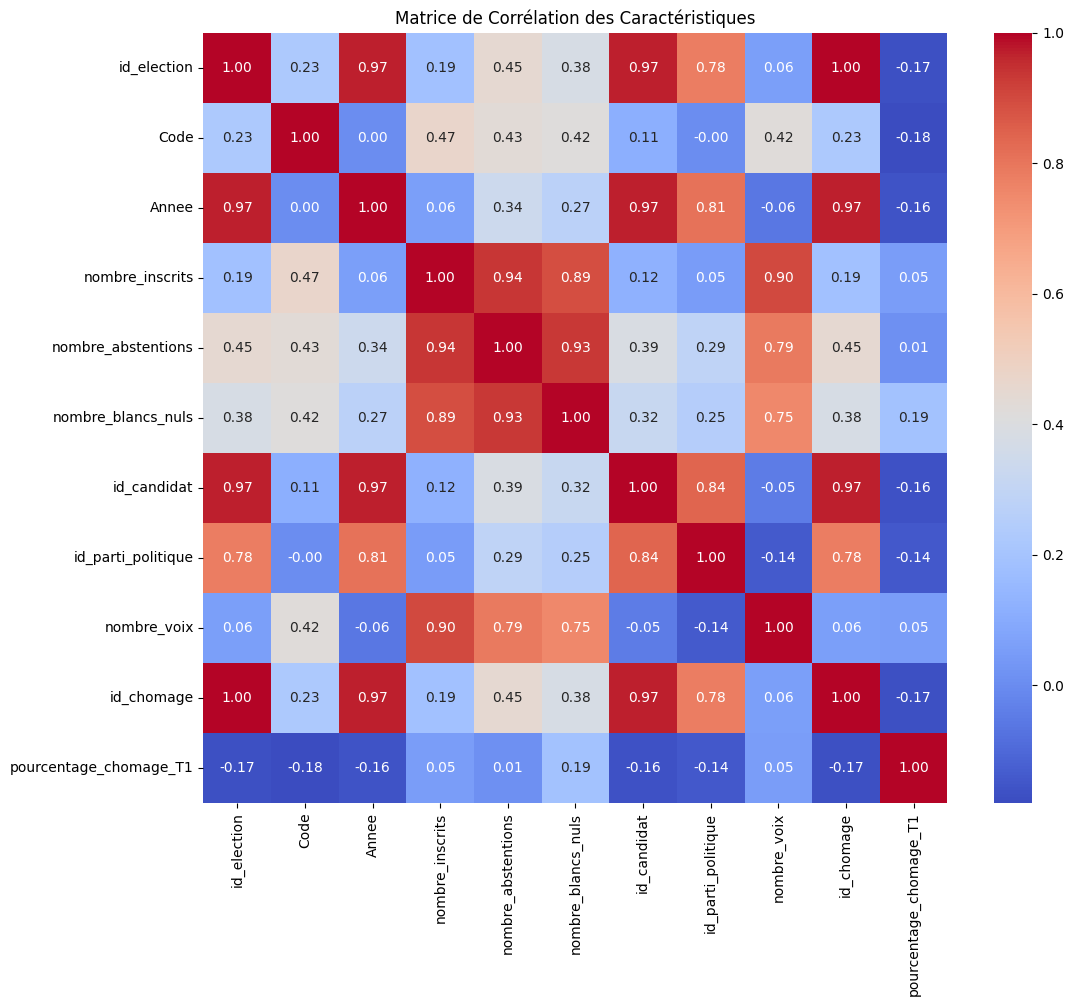

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Chargement des données
donnees_elections = pd.read_csv('Datasets/donnees_completes_finales.csv')

# Calcul de la matrice de corrélation
corr_matrix = donnees_elections.corr()

# Création de la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()

